# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 02.2021
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2021


In [2]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import xarray
import shutil
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [4]:
def request(rqdict, source, remove_file=True):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        source,rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./download/')
    z.close()
    print('Request took: ' + str(time.time() - t0) + ' seconds')
    
    files = glob.glob('./download/*.nc')
    
    if files[0].split('/')[-1].startswith('IGRA'):
        ds = xarray.open_dataset(files[0])            
        data = ds.to_dataframe()
        for i in files[1:]:
            ds = xarray.open_dataset(i)            
            data = data.append(ds.to_dataframe())

    else:
        data=eua.CDMDataset(files[0]).to_dataframe()
        for i in files[1:]:
            da = eua.CDMDataset(i).to_dataframe()
            data = data.append(da)
            
    os.remove('download.zip')
    if remove_file:
        try:
           shutil.rmtree('./download/')
        except:
           print('Error while deleting directory')

    return data

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (CUON)
# Vienna 11035

In [5]:
loc = '11035'

---

## Loading Data:

The loading of the data shows if there is any differance in the retreival performance.

In [6]:
cuon = 'insitu-comprehensive-upper-air-observation-network'
igra = 'insitu-observations-igra-baseline-network'

# CUON
## Requesting the whole temperature data of Vienna:
### Request took: 87 seconds
### 1949-02-08 04:00:00 - 2020-12-31 11:30:00 -> 10346190 messurements

In [7]:
cachworkaround = np.random.random_sample()
da_c = request({
    'variable': 'temperature',
    'statid': '11035',
#     'date': '20000101-20100101',
    'optional': ['bias_estimate','obs_minus_an','obs_minus_bg'],
    'cachworkaround': cachworkaround,
}, cuon)

2021-02-16 12:50:55,814 INFO Welcome to the CDS
2021-02-16 12:50:55,815 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-16 12:50:55,878 INFO Request is queued
2021-02-16 12:50:56,914 INFO Request is running
2021-02-16 12:51:45,460 INFO Request is completed
2021-02-16 12:51:45,460 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1613476292.182663-7981-3-c9890de5-a131-4e97-990b-cd4704b28b1f.zip to download.zip (270.7M)
2021-02-16 12:52:22,320 INFO Download rate 7.3M/s  


Request took: 87.05852770805359 seconds
2021-02-16 12:52:22,741 - upperair.cdm | __init__ - DEBUG - [OPEN] ./download/dest_0-20000-0-11035_air_temperature.nc


2021-02-16 12:52:22,741 DEBUG [OPEN] ./download/dest_0-20000-0-11035_air_temperature.nc


2021-02-16 12:52:22,753 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)


2021-02-16 12:52:22,753 INFO Reading Profile on slice(None, None, None)


2021-02-16 12:52:24,864 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


2021-02-16 12:52:24,864 DEBUG Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


In [8]:
da_c

bias_estimate        lat       lon  obs  obs_minus_an  obs_minus_bg  \
0                  NaN  48.248600  16.35640    0           NaN           NaN   
1                  NaN  48.248600  16.35640    0           NaN           NaN   
2                  NaN  48.248600  16.35640    0           NaN           NaN   
3                  NaN  48.248600  16.35640    0           NaN           NaN   
4                  NaN  48.248600  16.35640    0           NaN           NaN   
...                ...        ...       ...  ...           ...           ...   
6321336            0.0  48.248951  16.35718    0      1.490277      1.890486   
6321337            0.0  48.248951  16.35718    0      1.596191      2.173703   
6321338            0.0  48.248951  16.35718    0      1.695447      2.272982   
6321339            0.0  48.248951  16.35718    0      1.669335      2.246903   
6321340            0.0  48.248951  16.35718    0      1.796389      2.374047   

            plev    report_id                 station_id          ta  \
0        32000.0  30000000849  WIEN/HOHE WARTE (11035-0)  226.649994   
1        40000.0  30000000849  WIEN/HOHE WARTE (11035-0)  236.649994   
2        43000.0  30000000849  WIEN/HOHE WARTE (11035-0)  240.649994   
3        50000.0  30000000849  WIEN/HOHE WARTE (11035-0)  248.649994   
4        52300.0  30000000849  WIEN/HOHE WARTE (11035-0)  251.649994   
...          ...          ...                        ...         ...   
6321336  98130.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.739990   
6321337  98190.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.839996   
6321338  98210.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.950012   
6321339  98240.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.940002   
6321340  98320.0  10000056183  WIEN/HOHE WARTE (11035-0)  279.109985   

                       time trajectory_label  
0       1949-02-08 04:00:00      30000000001  
1       1949-02-08 04:00:00      30000000002  
2       1949-02-08 04:00:00      30000000002  
3       1949-02-08 04:00:00      30000000002  
4       1949-02-08 04:00:00      30000000002  
...                     ...              ...  
6321336 2020-12-31 11:30:10      30000000001  
6321337 2020-12-31 11:30:10      30000000001  
6321338 2020-12-31 11:30:10      30000000001  
6321339 2020-12-31 11:30:10      30000000001  
6321340 2020-12-31 11:30:10      30000000001  

[6321341 rows x 12 columns]

# IGRA
## Requesting the whole temperature data of Vienna:
### Request took: 620 seconds
### 1978-04-01 00:00:00 - 2019-10-01 12:00:00 -> 2202090 messurements

In [9]:
da_i = request({
    'source': 'IGRA',
    'variable': ['air_temperature'],
    'station_name': ['AUM00011035'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 12:55:05,031 INFO Welcome to the CDS
2021-02-16 12:55:05,032 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 12:55:05,124 INFO Request is completed
2021-02-16 12:55:05,124 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.insitu_reference.retrieve_test-1613462465.1009684-16806-7-4efe411c-45f6-48be-924d-50c9ea957341.zip to download.zip (17.8M)
2021-02-16 12:55:06,233 INFO Download rate 16.1M/s  


Request took: 1.8164820671081543 seconds


In [10]:
da_i

station_name report_timestamp  report_id  longitude  latitude  \
index                                                                   
0        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
1        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
2        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
3        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
4        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
...              ...              ...        ...        ...       ...   
2202085  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202086  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202087  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202088  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202089  AUM00011035       2019-10-01   28172966    16.3564   48.2486   

         air_pressure  air_temperature  
index                                   
0               600.0       228.449997  
1               760.0       226.250000  
2               840.0       222.449997  
3              1000.0       221.449997  
4              1080.0       221.050003  
...               ...              ...  
2202085       14300.0       212.649994  
2202086        3420.0       212.850006  
2202087        2700.0       214.649994  
2202088       12100.0       208.250000  
2202089       16900.0       206.449997  

[2202090 rows x 7 columns]

# IGRA Harmonized
## Requesting the whole temperature data of Vienna:
### Request took: 260 seconds
### 1978-01-02 00:00:00 - 2019-09-29 23:30:00 -> 1317532 messurements

In [11]:
da_ih = request({
    'source': 'IGRA_H',
    'variable': ['air_temperature'],
    'station_name': ['AUM00011035'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 12:55:47,596 INFO Welcome to the CDS
2021-02-16 12:55:47,597 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 12:55:47,664 INFO Request is completed
2021-02-16 12:55:47,665 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.insitu_reference.retrieve_test-1613462696.6919932-17316-3-72bbe9fa-9607-4b73-a2be-feca69ca1fa9.zip to download.zip (18.2M)
2021-02-16 12:55:49,160 INFO Download rate 12.1M/s  


Request took: 2.1117794513702393 seconds


In [12]:
da_ih

station_name report_timestamp             actual_time  report_id  \
index                                                                      
0        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
1        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
2        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
3        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
4        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
...              ...              ...                     ...        ...   
1317527  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   
1317528  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   
1317529  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   
1317530  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   
1317531  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   

         longitude  latitude  height_of_station_above_sea_level  air_pressure  \
index                                                                           
0          16.3564   48.2486                                200         25000   
1          16.3564   48.2486                                200         70000   
2          16.3564   48.2486                                200         15000   
3          16.3564   48.2486                                200          1850   
4          16.3564   48.2486                                200          7000   
...            ...       ...                                ...           ...   
1317527    16.3564   48.2486                                200         47100   
1317528    16.3564   48.2486                                200         15000   
1317529    16.3564   48.2486                                200         97300   
1317530    16.3564   48.2486                                200         43500   
1317531    16.3564   48.2486                                200         27200   

         air_temperature  
index                     
0             217.820007  
1             265.179993  
2             213.270004  
3             206.350006  
4             208.679993  
...                  ...  
1317527       255.050003  
1317528       216.649994  
1317529       291.350006  
1317530       251.649994  
1317531       225.050003  

[1317532 rows x 9 columns]

---

In [13]:
comp = da_c
igra = da_i
igrah = da_ih

In [14]:
igra

station_name report_timestamp  report_id  longitude  latitude  \
index                                                                   
0        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
1        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
2        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
3        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
4        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
...              ...              ...        ...        ...       ...   
2202085  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202086  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202087  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202088  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202089  AUM00011035       2019-10-01   28172966    16.3564   48.2486   

         air_pressure  air_temperature  
index                                   
0               600.0       228.449997  
1               760.0       226.250000  
2               840.0       222.449997  
3              1000.0       221.449997  
4              1080.0       221.050003  
...               ...              ...  
2202085       14300.0       212.649994  
2202086        3420.0       212.850006  
2202087        2700.0       214.649994  
2202088       12100.0       208.250000  
2202089       16900.0       206.449997  

[2202090 rows x 7 columns]

In [15]:
igrah

station_name report_timestamp             actual_time  report_id  \
index                                                                      
0        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
1        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
2        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
3        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
4        AUM00011035       1978-01-02  1978-01-02 00:00:00+00    9460973   
...              ...              ...                     ...        ...   
1317527  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   
1317528  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   
1317529  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   
1317530  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   
1317531  AUM00011035       2019-09-30  2019-09-29 23:30:00+00    9437260   

         longitude  latitude  height_of_station_above_sea_level  air_pressure  \
index                                                                           
0          16.3564   48.2486                                200         25000   
1          16.3564   48.2486                                200         70000   
2          16.3564   48.2486                                200         15000   
3          16.3564   48.2486                                200          1850   
4          16.3564   48.2486                                200          7000   
...            ...       ...                                ...           ...   
1317527    16.3564   48.2486                                200         47100   
1317528    16.3564   48.2486                                200         15000   
1317529    16.3564   48.2486                                200         97300   
1317530    16.3564   48.2486                                200         43500   
1317531    16.3564   48.2486                                200         27200   

         air_temperature  
index                     
0             217.820007  
1             265.179993  
2             213.270004  
3             206.350006  
4             208.679993  
...                  ...  
1317527       255.050003  
1317528       216.649994  
1317529       291.350006  
1317530       251.649994  
1317531       225.050003  

[1317532 rows x 9 columns]

In [16]:
orig_cols_comp = comp.columns
print('orig_cols_comp: ', orig_cols_comp)
orig_cols_igra = igrah.columns
print('orig_cols_igra: ', orig_cols_igra)

df = pandas.merge(igra, igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
print('getting igra and igrah to same len')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

new_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igrah.columns=newcols
print('new_igrah')
display(new_igrah)

new_igra = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igra.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igra.columns=newcols
print('new_igra')
display(new_igra)

print('cutting those measurments out, which are both in igrah and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igrah.columns=newcols
for col in adj_igrah.columns:
    if not col in orig_cols_igra:
        adj_igrah = adj_igrah.drop(columns=col)
print('adj_igrah')
display(adj_igrah)

adj_comp = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_comp.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_comp.columns=newcols
adj_comp = adj_comp.rename(columns={"report_timestamp": "time", "air_pressure": "plev"})
for col in adj_comp.columns:
    if not col in orig_cols_comp:
        adj_comp = adj_comp.drop(columns=col)
print('adj_comp')
display(adj_comp)

print('cutting those measurments out, which are both in igra and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igra, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igra = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igra.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igra.columns=newcols
for col in adj_igra.columns:
    if not col in orig_cols_igra:
        adj_igra = adj_igra.drop(columns=col)
print('adj_igra')
display(adj_igra)


# igra = igra[df.Exist]
# igra

# comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"})

orig_cols_comp:  Index(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg',
       'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory_label'],
      dtype='object')
orig_cols_igra:  Index(['station_name', 'report_timestamp', 'actual_time', 'report_id',
       'longitude', 'latitude', 'height_of_station_above_sea_level',
       'air_pressure', 'air_temperature'],
      dtype='object')
getting igra and igrah to same len


station_name_x report_timestamp  report_id_x  longitude_x  latitude_x  \
0          AUM00011035       1978-04-01     28176112      16.3564     48.2486   
1          AUM00011035       1978-04-01     28176112      16.3564     48.2486   
2          AUM00011035       1978-04-01     28176112      16.3564     48.2486   
3          AUM00011035       1978-04-01     28176112      16.3564     48.2486   
4          AUM00011035       1978-04-01     28176112      16.3564     48.2486   
...                ...              ...          ...          ...         ...   
2202085    AUM00011035       2019-10-01     28172966      16.3564     48.2486   
2202086    AUM00011035       2019-10-01     28172966      16.3564     48.2486   
2202087    AUM00011035       2019-10-01     28172966      16.3564     48.2486   
2202088    AUM00011035       2019-10-01     28172966      16.3564     48.2486   
2202089    AUM00011035       2019-10-01     28172966      16.3564     48.2486   

         air_pressure  air_temperature_x station_name_y  \
0               600.0         228.449997            NaN   
1               760.0         226.250000            NaN   
2               840.0         222.449997            NaN   
3              1000.0         221.449997    AUM00011035   
4              1080.0         221.050003    AUM00011035   
...               ...                ...            ...   
2202085       14300.0         212.649994    AUM00011035   
2202086        3420.0         212.850006    AUM00011035   
2202087        2700.0         214.649994    AUM00011035   
2202088       12100.0         208.250000    AUM00011035   
2202089       16900.0         206.449997    AUM00011035   

                    actual_time  report_id_y  longitude_y  latitude_y  \
0                           NaN          NaN          NaN         NaN   
1                           NaN          NaN          NaN         NaN   
2                           NaN          NaN          NaN         NaN   
3        1978-04-01 00:00:00+00    9462392.0      16.3564     48.2486   
4        1978-04-01 00:00:00+00    9462392.0      16.3564     48.2486   
...                         ...          ...          ...         ...   
2202085  2019-09-30 23:30:00+00    9434208.0      16.3564     48.2486   
2202086  2019-09-30 23:30:00+00    9434208.0      16.3564     48.2486   
2202087  2019-09-30 23:30:00+00    9434208.0      16.3564     48.2486   
2202088  2019-09-30 23:30:00+00    9434208.0      16.3564     48.2486   
2202089  2019-09-30 23:30:00+00    9434208.0      16.3564     48.2486   

         height_of_station_above_sea_level  air_temperature_y      Exist  
0                                      NaN                NaN  left_only  
1                                      NaN                NaN  left_only  
2                                      NaN                NaN  left_only  
3                                    200.0         221.449997       both  
4                                    200.0         221.020004       both  
...                                    ...                ...        ...  
2202085                              200.0         212.649994       both  
2202086                              200.0         212.850006       both  
2202087                              200.0         214.649994       both  
2202088                              200.0         208.250000       both  
2202089                              200.0         206.449997       both  

[2202090 rows x 15 columns]

new_igrah


report_timestamp  air_pressure station_name             actual_time  \
3             1978-04-01        1000.0  AUM00011035  1978-04-01 00:00:00+00   
4             1978-04-01        1080.0  AUM00011035  1978-04-01 00:00:00+00   
5             1978-04-01        1450.0  AUM00011035  1978-04-01 00:00:00+00   
7             1978-04-01        2000.0  AUM00011035  1978-04-01 00:00:00+00   
8             1978-04-01        2700.0  AUM00011035  1978-04-01 00:00:00+00   
...                  ...           ...          ...                     ...   
2202085       2019-10-01       14300.0  AUM00011035  2019-09-30 23:30:00+00   
2202086       2019-10-01        3420.0  AUM00011035  2019-09-30 23:30:00+00   
2202087       2019-10-01        2700.0  AUM00011035  2019-09-30 23:30:00+00   
2202088       2019-10-01       12100.0  AUM00011035  2019-09-30 23:30:00+00   
2202089       2019-10-01       16900.0  AUM00011035  2019-09-30 23:30:00+00   

         report_id  longitude  latitude  height_of_station_above_sea_level  \
3        9462392.0    16.3564   48.2486                              200.0   
4        9462392.0    16.3564   48.2486                              200.0   
5        9462392.0    16.3564   48.2486                              200.0   
7        9462392.0    16.3564   48.2486                              200.0   
8        9462392.0    16.3564   48.2486                              200.0   
...            ...        ...       ...                                ...   
2202085  9434208.0    16.3564   48.2486                              200.0   
2202086  9434208.0    16.3564   48.2486                              200.0   
2202087  9434208.0    16.3564   48.2486                              200.0   
2202088  9434208.0    16.3564   48.2486                              200.0   
2202089  9434208.0    16.3564   48.2486                              200.0   

         air_temperature  
3             221.449997  
4             221.020004  
5             215.089996  
7             214.699997  
8             214.660004  
...                  ...  
2202085       212.649994  
2202086       212.850006  
2202087       214.649994  
2202088       208.250000  
2202089       206.449997  

[1293453 rows x 9 columns]

new_igra


station_name report_timestamp  report_id  longitude  latitude  \
3        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
4        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
5        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
7        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
8        AUM00011035       1978-04-01   28176112    16.3564   48.2486   
...              ...              ...        ...        ...       ...   
2202085  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202086  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202087  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202088  AUM00011035       2019-10-01   28172966    16.3564   48.2486   
2202089  AUM00011035       2019-10-01   28172966    16.3564   48.2486   

         air_pressure  air_temperature             actual_time  \
3              1000.0       221.449997  1978-04-01 00:00:00+00   
4              1080.0       221.050003  1978-04-01 00:00:00+00   
5              1450.0       215.250000  1978-04-01 00:00:00+00   
7              2000.0       215.050003  1978-04-01 00:00:00+00   
8              2700.0       214.850006  1978-04-01 00:00:00+00   
...               ...              ...                     ...   
2202085       14300.0       212.649994  2019-09-30 23:30:00+00   
2202086        3420.0       212.850006  2019-09-30 23:30:00+00   
2202087        2700.0       214.649994  2019-09-30 23:30:00+00   
2202088       12100.0       208.250000  2019-09-30 23:30:00+00   
2202089       16900.0       206.449997  2019-09-30 23:30:00+00   

         height_of_station_above_sea_level  
3                                    200.0  
4                                    200.0  
5                                    200.0  
7                                    200.0  
8                                    200.0  
...                                    ...  
2202085                              200.0  
2202086                              200.0  
2202087                              200.0  
2202088                              200.0  
2202089                              200.0  

[1293453 rows x 9 columns]

cutting those measurments out, which are both in igrah and comp


bias_estimate        lat       lon  obs  obs_minus_an  obs_minus_bg  \
0                  NaN  48.248600  16.35640    0           NaN           NaN   
1                  NaN  48.248600  16.35640    0           NaN           NaN   
2                  NaN  48.248600  16.35640    0           NaN           NaN   
3                  NaN  48.248600  16.35640    0           NaN           NaN   
4                  NaN  48.248600  16.35640    0           NaN           NaN   
...                ...        ...       ...  ...           ...           ...   
6321336            0.0  48.248951  16.35718    0      1.490277      1.890486   
6321337            0.0  48.248951  16.35718    0      1.596191      2.173703   
6321338            0.0  48.248951  16.35718    0      1.695447      2.272982   
6321339            0.0  48.248951  16.35718    0      1.669335      2.246903   
6321340            0.0  48.248951  16.35718    0      1.796389      2.374047   

         air_pressure  report_id_x                 station_id          ta  \
0             32000.0  30000000849  WIEN/HOHE WARTE (11035-0)  226.649994   
1             40000.0  30000000849  WIEN/HOHE WARTE (11035-0)  236.649994   
2             43000.0  30000000849  WIEN/HOHE WARTE (11035-0)  240.649994   
3             50000.0  30000000849  WIEN/HOHE WARTE (11035-0)  248.649994   
4             52300.0  30000000849  WIEN/HOHE WARTE (11035-0)  251.649994   
...               ...          ...                        ...         ...   
6321336       98130.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.739990   
6321337       98190.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.839996   
6321338       98210.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.950012   
6321339       98240.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.940002   
6321340       98320.0  10000056183  WIEN/HOHE WARTE (11035-0)  279.109985   

           report_timestamp trajectory_label station_name actual_time  \
0       1949-02-08 04:00:00      30000000001          NaN         NaN   
1       1949-02-08 04:00:00      30000000002          NaN         NaN   
2       1949-02-08 04:00:00      30000000002          NaN         NaN   
3       1949-02-08 04:00:00      30000000002          NaN         NaN   
4       1949-02-08 04:00:00      30000000002          NaN         NaN   
...                     ...              ...          ...         ...   
6321336 2020-12-31 11:30:10      30000000001          NaN         NaN   
6321337 2020-12-31 11:30:10      30000000001          NaN         NaN   
6321338 2020-12-31 11:30:10      30000000001          NaN         NaN   
6321339 2020-12-31 11:30:10      30000000001          NaN         NaN   
6321340 2020-12-31 11:30:10      30000000001          NaN         NaN   

         report_id_y  longitude  latitude  height_of_station_above_sea_level  \
0                NaN        NaN       NaN                                NaN   
1                NaN        NaN       NaN                                NaN   
2                NaN        NaN       NaN                                NaN   
3                NaN        NaN       NaN                                NaN   
4                NaN        NaN       NaN                                NaN   
...              ...        ...       ...                                ...   
6321336          NaN        NaN       NaN                                NaN   
6321337          NaN        NaN       NaN                                NaN   
6321338          NaN        NaN       NaN                                NaN   
6321339          NaN        NaN       NaN                                NaN   
6321340          NaN        NaN       NaN                                NaN   

         air_temperature      Exist  
0                    NaN  left_only  
1                    NaN  left_only  
2                    NaN  left_only  
3                    NaN  left_only  
4                    NaN  left_only  
...                  ...        ...  
6321336            

adj_igrah


air_pressure    report_timestamp station_name  \
533823         1000.0 1978-04-01 00:00:00  AUM00011035   
533824         1080.0 1978-04-01 00:00:00  AUM00011035   
533825         1450.0 1978-04-01 00:00:00  AUM00011035   
533826         2000.0 1978-04-01 00:00:00  AUM00011035   
533827         2700.0 1978-04-01 00:00:00  AUM00011035   
...               ...                 ...          ...   
2597571       76700.0 2018-08-03 12:00:00  AUM00011035   
2597572       77000.0 2018-08-03 12:00:00  AUM00011035   
2597573       85000.0 2018-08-03 12:00:00  AUM00011035   
2597574       86200.0 2018-08-03 12:00:00  AUM00011035   
2597575       92500.0 2018-08-03 12:00:00  AUM00011035   

                    actual_time  report_id  longitude  latitude  \
533823   1978-04-01 00:00:00+00  9462392.0    16.3564   48.2486   
533824   1978-04-01 00:00:00+00  9462392.0    16.3564   48.2486   
533825   1978-04-01 00:00:00+00  9462392.0    16.3564   48.2486   
533826   1978-04-01 00:00:00+00  9462392.0    16.3564   48.2486   
533827   1978-04-01 00:00:00+00  9462392.0    16.3564   48.2486   
...                         ...        ...        ...       ...   
2597571  2018-08-03 11:30:00+00  9440072.0    16.3564   48.2486   
2597572  2018-08-03 11:30:00+00  9440072.0    16.3564   48.2486   
2597573  2018-08-03 11:30:00+00  9440072.0    16.3564   48.2486   
2597574  2018-08-03 11:30:00+00  9440072.0    16.3564   48.2486   
2597575  2018-08-03 11:30:00+00  9440072.0    16.3564   48.2486   

         height_of_station_above_sea_level  air_temperature  
533823                               200.0       221.449997  
533824                               200.0       221.020004  
533825                               200.0       215.089996  
533826                               200.0       214.699997  
533827                               200.0       214.660004  
...                                    ...              ...  
2597571                              200.0       283.750000  
2597572                              200.0       283.149994  
2597573                              200.0       289.950012  
2597574                              200.0       290.950012  
2597575                              200.0       296.950012  

[1103211 rows x 9 columns]

adj_comp


bias_estimate    lat        lon  obs  obs_minus_an  obs_minus_bg  \
533823       -2.985349  48.25  16.370001    0      1.297068      1.868193   
533824       -2.985349  48.25  16.370001    0      2.081661      2.439222   
533825       -2.480201  48.25  16.370001    0      0.577567     -0.015139   
533826       -1.944721  48.25  16.370001    0      1.026877      0.478695   
533827       -1.703926  48.25  16.370001    0      1.640319      2.117044   
...                ...    ...        ...  ...           ...           ...   
2597571       0.019255  48.25  16.360001    0     -0.249225      0.164550   
2597572       0.019255  48.25  16.360001    0     -1.040331     -0.609619   
2597573       0.022500  48.25  16.360001    0     -0.410012     -0.143677   
2597574       0.024780  48.25  16.360001    0     -0.587030     -0.315125   
2597575       0.036250  48.25  16.360001    0     -0.693821     -0.395950   

            plev    report_id                 station_id          ta  \
533823    1000.0  20000028088  WIEN/HOHE WARTE (11035-0)  221.500000   
533824    1080.0  20000028088  WIEN/HOHE WARTE (11035-0)  221.100006   
533825    1450.0  20000028088  WIEN/HOHE WARTE (11035-0)  215.300003   
533826    2000.0  20000028088  WIEN/HOHE WARTE (11035-0)  215.100006   
533827    2700.0  20000028088  WIEN/HOHE WARTE (11035-0)  214.899994   
...          ...          ...                        ...         ...   
2597571  76700.0  10000054167  WIEN/HOHE WARTE (11035-0)  283.799988   
2597572  77000.0  10000054167  WIEN/HOHE WARTE (11035-0)  283.200012   
2597573  85000.0  10000054167  WIEN/HOHE WARTE (11035-0)  290.000000   
2597574  86200.0  10000054167  WIEN/HOHE WARTE (11035-0)  291.000000   
2597575  92500.0  10000054167  WIEN/HOHE WARTE (11035-0)  297.000000   

                       time trajectory_label  
533823  1978-04-01 00:00:00      20000028088  
533824  1978-04-01 00:00:00      20000028088  
533825  1978-04-01 00:00:00      20000028088  
533826  1978-04-01 00:00:00      20000028088  
533827  1978-04-01 00:00:00      20000028088  
...                     ...              ...  
2597571 2018-08-03 12:00:00      10000054167  
2597572 2018-08-03 12:00:00      10000054167  
2597573 2018-08-03 12:00:00      10000054167  
2597574 2018-08-03 12:00:00      10000054167  
2597575 2018-08-03 12:00:00      10000054167  

[1103211 rows x 12 columns]

cutting those measurments out, which are both in igra and comp


bias_estimate        lat       lon  obs  obs_minus_an  obs_minus_bg  \
0                  NaN  48.248600  16.35640    0           NaN           NaN   
1                  NaN  48.248600  16.35640    0           NaN           NaN   
2                  NaN  48.248600  16.35640    0           NaN           NaN   
3                  NaN  48.248600  16.35640    0           NaN           NaN   
4                  NaN  48.248600  16.35640    0           NaN           NaN   
...                ...        ...       ...  ...           ...           ...   
6321336            0.0  48.248951  16.35718    0      1.490277      1.890486   
6321337            0.0  48.248951  16.35718    0      1.596191      2.173703   
6321338            0.0  48.248951  16.35718    0      1.695447      2.272982   
6321339            0.0  48.248951  16.35718    0      1.669335      2.246903   
6321340            0.0  48.248951  16.35718    0      1.796389      2.374047   

         air_pressure  report_id_x                 station_id          ta  \
0             32000.0  30000000849  WIEN/HOHE WARTE (11035-0)  226.649994   
1             40000.0  30000000849  WIEN/HOHE WARTE (11035-0)  236.649994   
2             43000.0  30000000849  WIEN/HOHE WARTE (11035-0)  240.649994   
3             50000.0  30000000849  WIEN/HOHE WARTE (11035-0)  248.649994   
4             52300.0  30000000849  WIEN/HOHE WARTE (11035-0)  251.649994   
...               ...          ...                        ...         ...   
6321336       98130.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.739990   
6321337       98190.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.839996   
6321338       98210.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.950012   
6321339       98240.0  10000056183  WIEN/HOHE WARTE (11035-0)  278.940002   
6321340       98320.0  10000056183  WIEN/HOHE WARTE (11035-0)  279.109985   

           report_timestamp trajectory_label station_name  report_id_y  \
0       1949-02-08 04:00:00      30000000001          NaN          NaN   
1       1949-02-08 04:00:00      30000000002          NaN          NaN   
2       1949-02-08 04:00:00      30000000002          NaN          NaN   
3       1949-02-08 04:00:00      30000000002          NaN          NaN   
4       1949-02-08 04:00:00      30000000002          NaN          NaN   
...                     ...              ...          ...          ...   
6321336 2020-12-31 11:30:10      30000000001          NaN          NaN   
6321337 2020-12-31 11:30:10      30000000001          NaN          NaN   
6321338 2020-12-31 11:30:10      30000000001          NaN          NaN   
6321339 2020-12-31 11:30:10      30000000001          NaN          NaN   
6321340 2020-12-31 11:30:10      30000000001          NaN          NaN   

         longitude  latitude  air_temperature actual_time  \
0              NaN       NaN              NaN         NaN   
1              NaN       NaN              NaN         NaN   
2              NaN       NaN              NaN         NaN   
3              NaN       NaN              NaN         NaN   
4              NaN       NaN              NaN         NaN   
...            ...       ...              ...         ...   
6321336        NaN       NaN              NaN         NaN   
6321337        NaN       NaN              NaN         NaN   
6321338        NaN       NaN              NaN         NaN   
6321339        NaN       NaN              NaN         NaN   
6321340        NaN       NaN              NaN         NaN   

         height_of_station_above_sea_level      Exist  
0                                      NaN  left_only  
1                                      NaN  left_only  
2                                      NaN  left_only  
3                                      NaN  left_only  
4                                      NaN  left_only  
...                                    ...        ...  
6321336                                NaN  left_only  
6321337                                NaN  left_only

adj_igra


air_pressure    report_timestamp station_name   report_id  longitude  \
533823         1000.0 1978-04-01 00:00:00  AUM00011035  28176112.0    16.3564   
533824         1080.0 1978-04-01 00:00:00  AUM00011035  28176112.0    16.3564   
533825         1450.0 1978-04-01 00:00:00  AUM00011035  28176112.0    16.3564   
533826         2000.0 1978-04-01 00:00:00  AUM00011035  28176112.0    16.3564   
533827         2700.0 1978-04-01 00:00:00  AUM00011035  28176112.0    16.3564   
...               ...                 ...          ...         ...        ...   
2597571       76700.0 2018-08-03 12:00:00  AUM00011035  28150041.0    16.3564   
2597572       77000.0 2018-08-03 12:00:00  AUM00011035  28150041.0    16.3564   
2597573       85000.0 2018-08-03 12:00:00  AUM00011035  28150041.0    16.3564   
2597574       86200.0 2018-08-03 12:00:00  AUM00011035  28150041.0    16.3564   
2597575       92500.0 2018-08-03 12:00:00  AUM00011035  28150041.0    16.3564   

         latitude  air_temperature             actual_time  \
533823    48.2486       221.449997  1978-04-01 00:00:00+00   
533824    48.2486       221.050003  1978-04-01 00:00:00+00   
533825    48.2486       215.250000  1978-04-01 00:00:00+00   
533826    48.2486       215.050003  1978-04-01 00:00:00+00   
533827    48.2486       214.850006  1978-04-01 00:00:00+00   
...           ...              ...                     ...   
2597571   48.2486       283.750000  2018-08-03 11:30:00+00   
2597572   48.2486       283.149994  2018-08-03 11:30:00+00   
2597573   48.2486       289.950012  2018-08-03 11:30:00+00   
2597574   48.2486       290.950012  2018-08-03 11:30:00+00   
2597575   48.2486       296.950012  2018-08-03 11:30:00+00   

         height_of_station_above_sea_level  
533823                               200.0  
533824                               200.0  
533825                               200.0  
533826                               200.0  
533827                               200.0  
...                                    ...  
2597571                              200.0  
2597572                              200.0  
2597573                              200.0  
2597574                              200.0  
2597575                              200.0  

[1103211 rows x 9 columns]

---

## Displaying and comparing the data on different pressure levels:
We will display the untouched data and also the data, where CUAN and IGRA have available data and compare both. <br>


In [17]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
# missing_i = []
# missing_c = []
comp_original = []
igrah_original = []
igra_original = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    igra_h_adjusted.append(adj_igrah[adj_igrah.air_pressure == i])
    igrah_original.append(new_igrah[new_igrah.air_pressure == i])
    
    igra_adjusted.append(adj_igra[adj_igra.air_pressure == i])
    igra_original.append(new_igra[new_igra.air_pressure == i])
    
    comp_adjusted.append(adj_comp[adj_comp.plev == i])
    comp_original.append(comp[comp.plev == i])
    

--- 
pressure level: 10000
--- 
pressure level: 20000
--- 
pressure level: 50000
--- 
pressure level: 85000


---

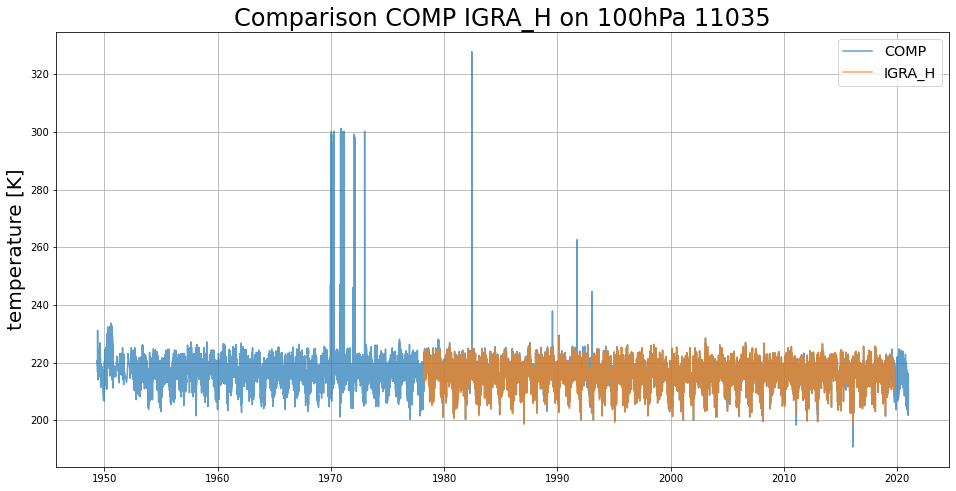

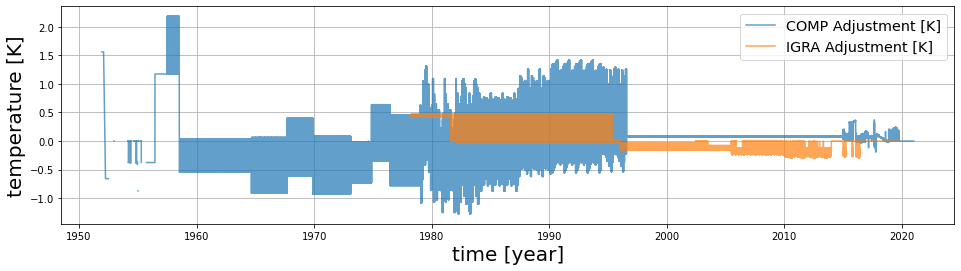

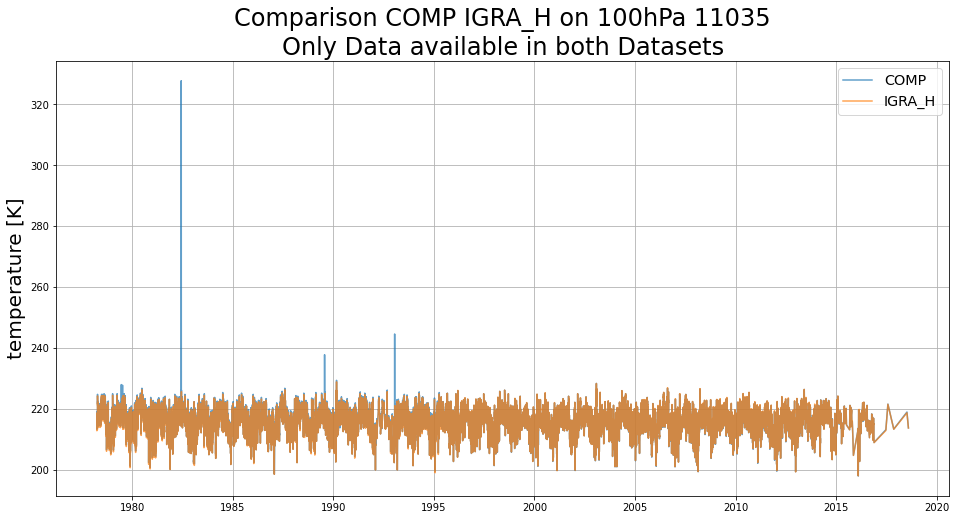

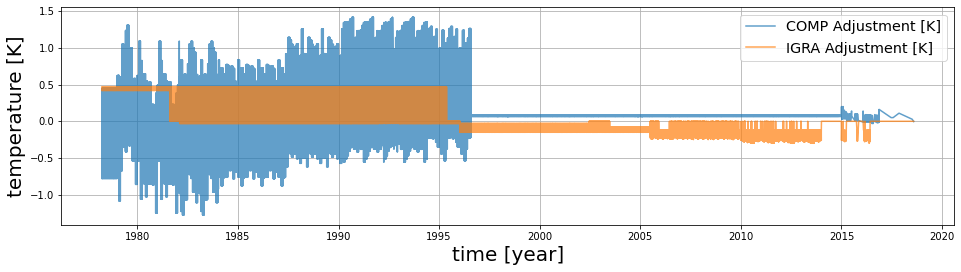

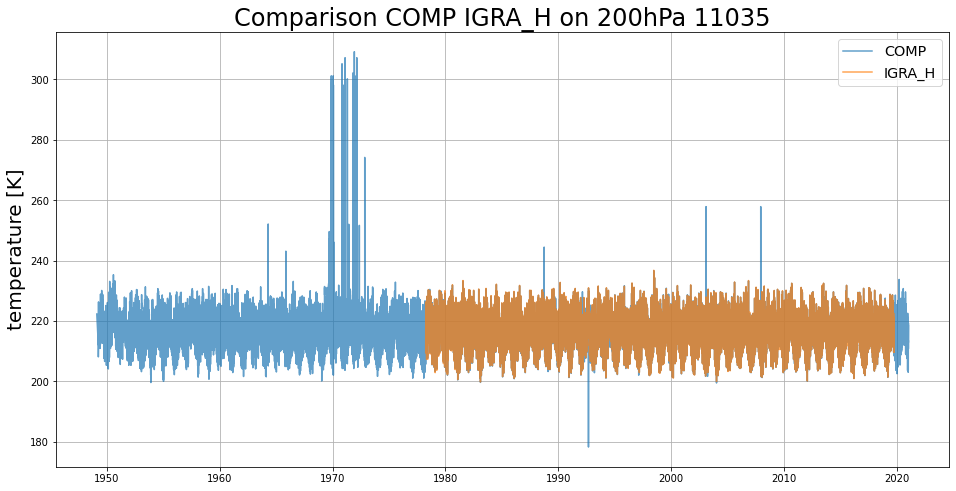

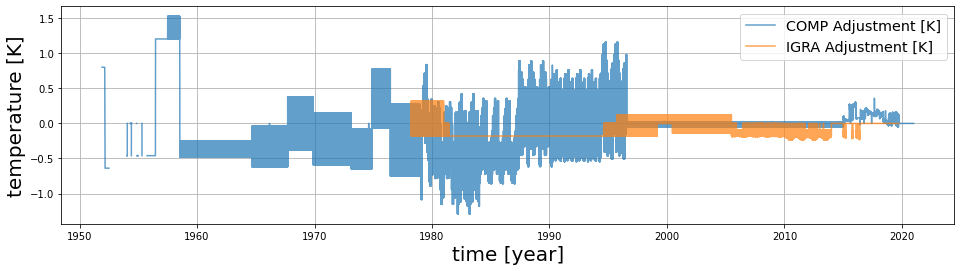

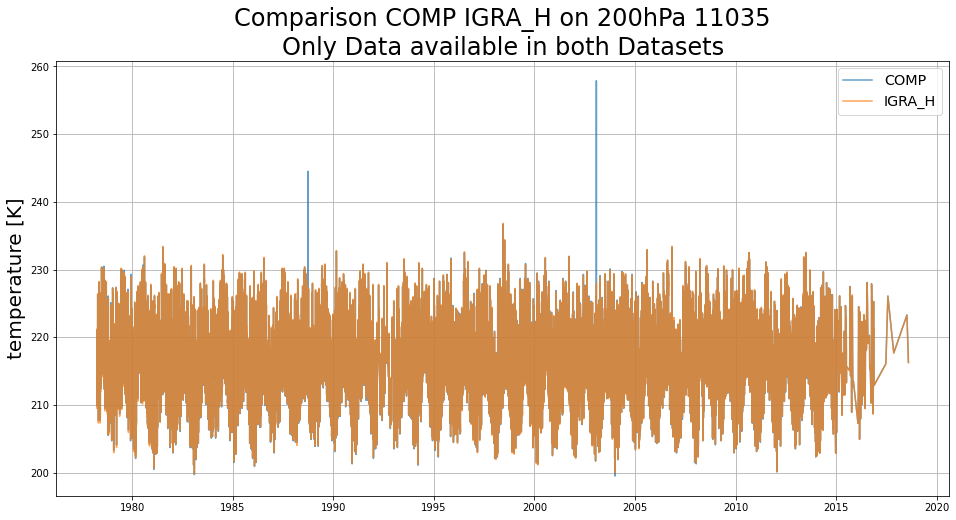

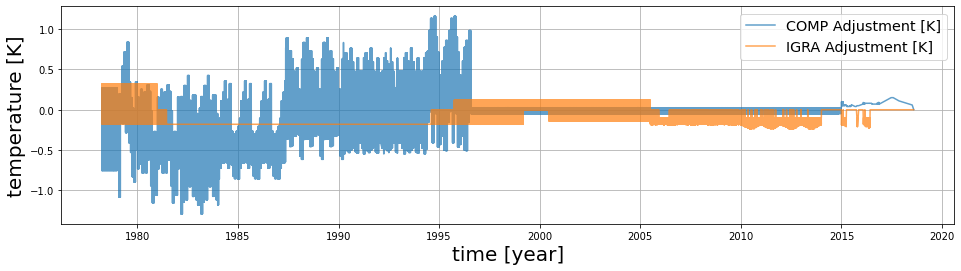

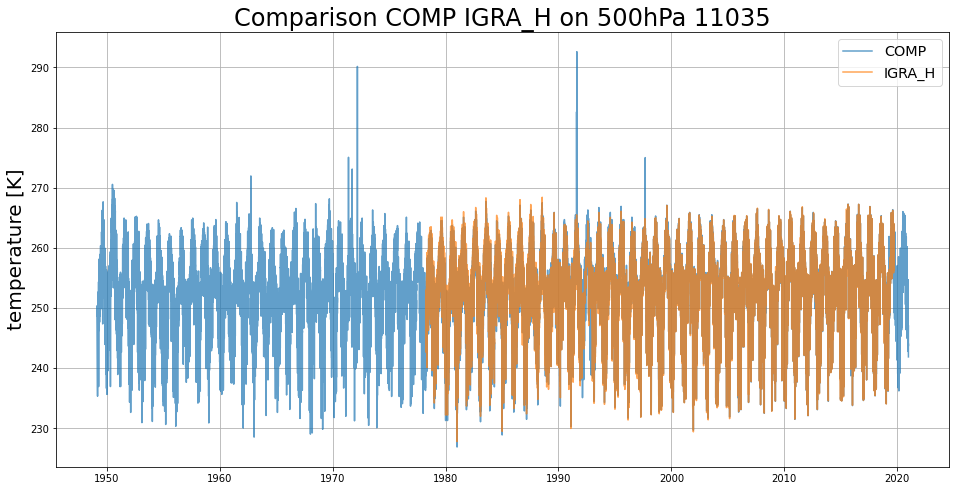

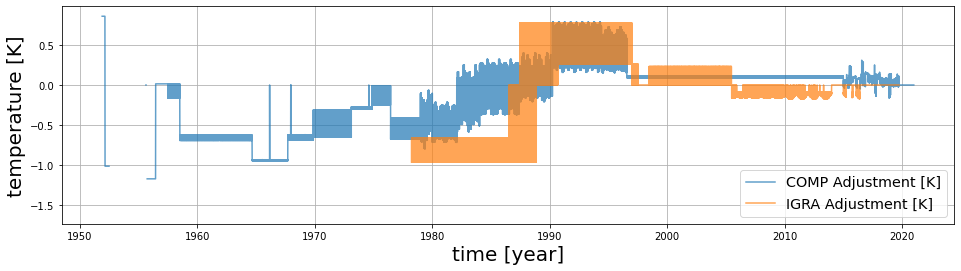

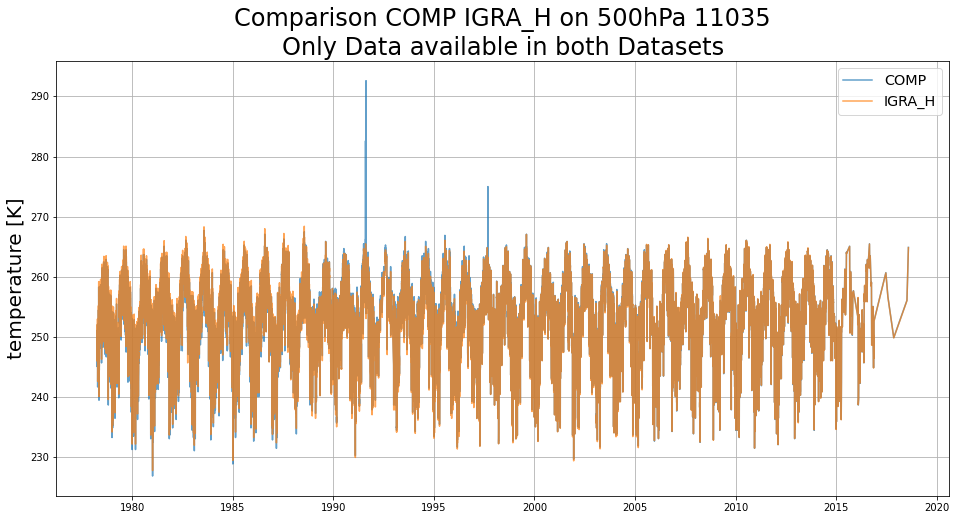

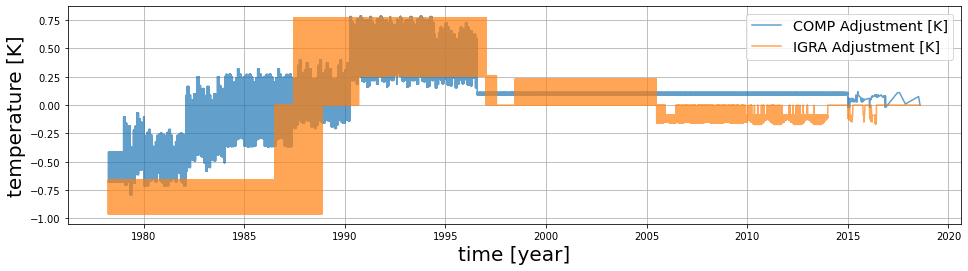

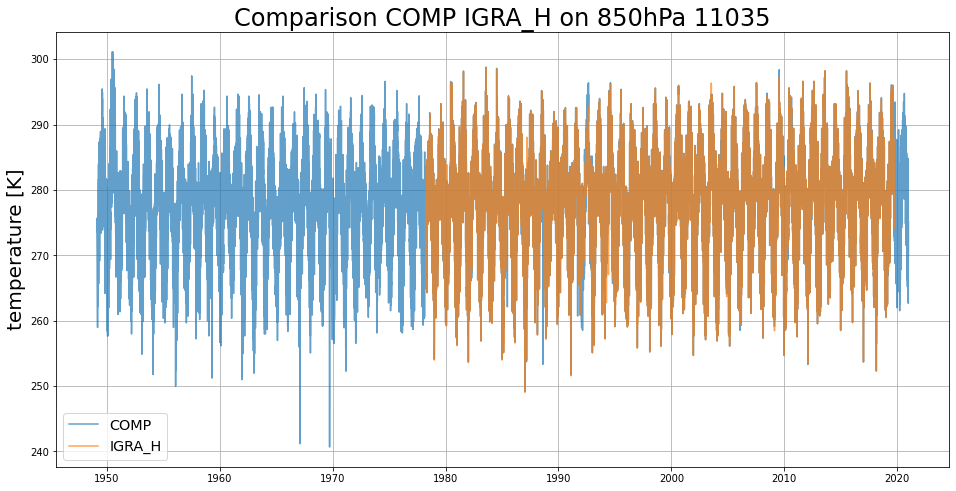

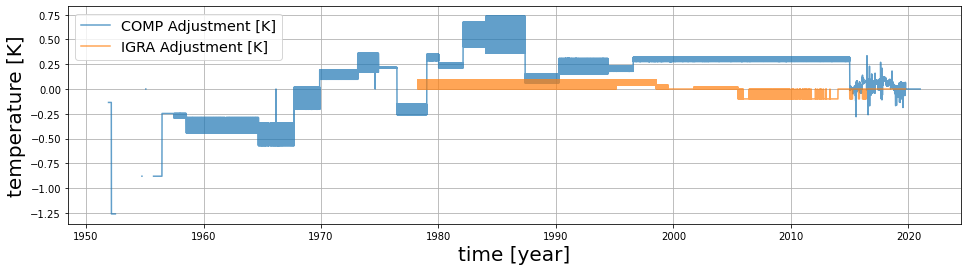

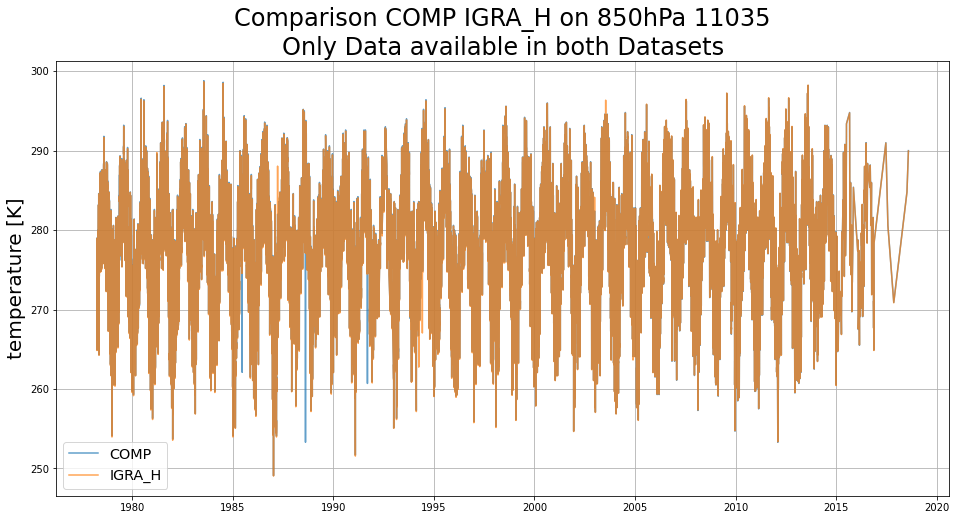

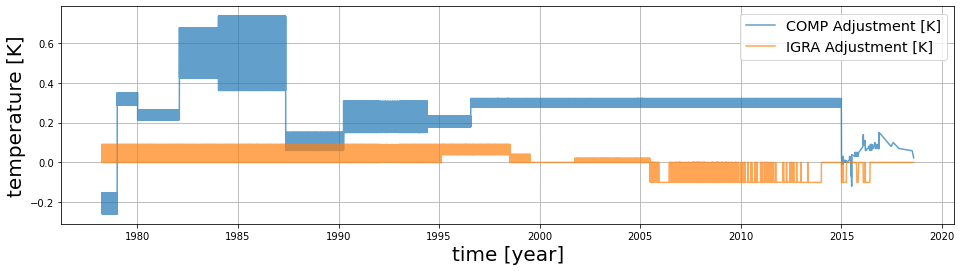

In [18]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_original[i]
    b = igrah_original[i]
    c = comp_original[i]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(b.report_timestamp, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc)
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(b.report_timestamp, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


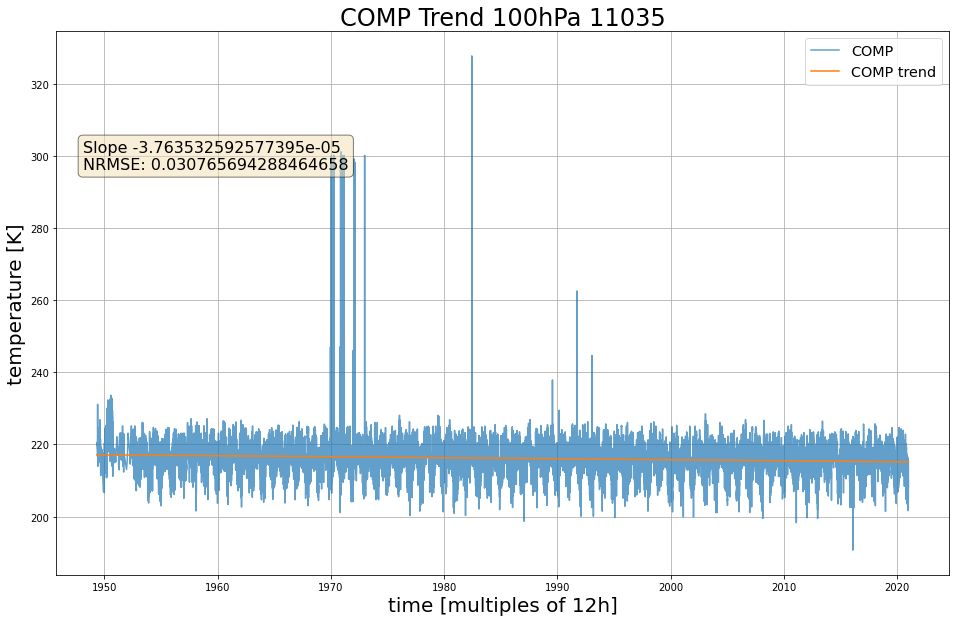

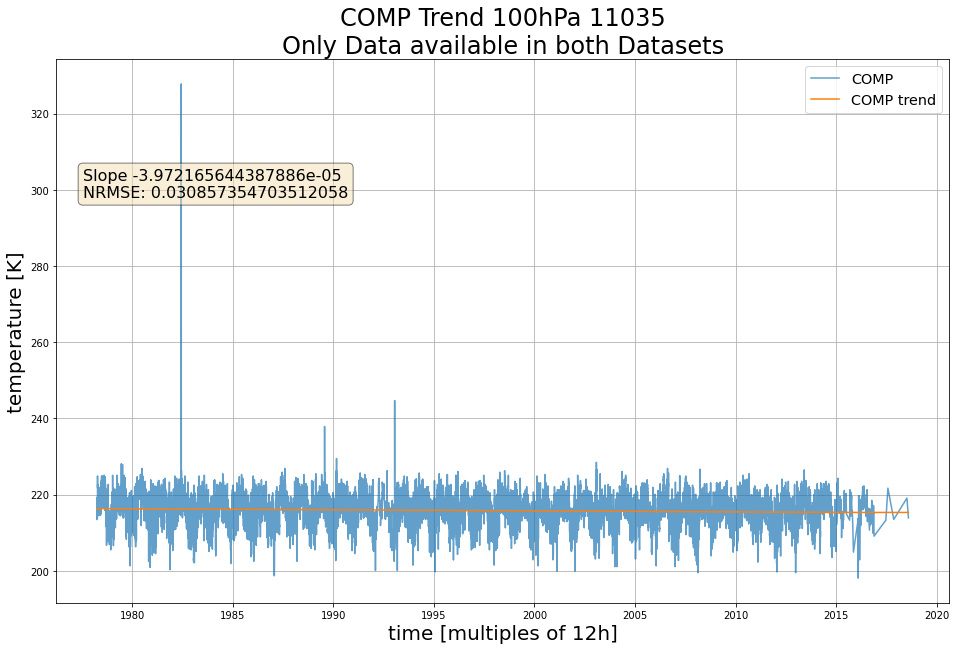

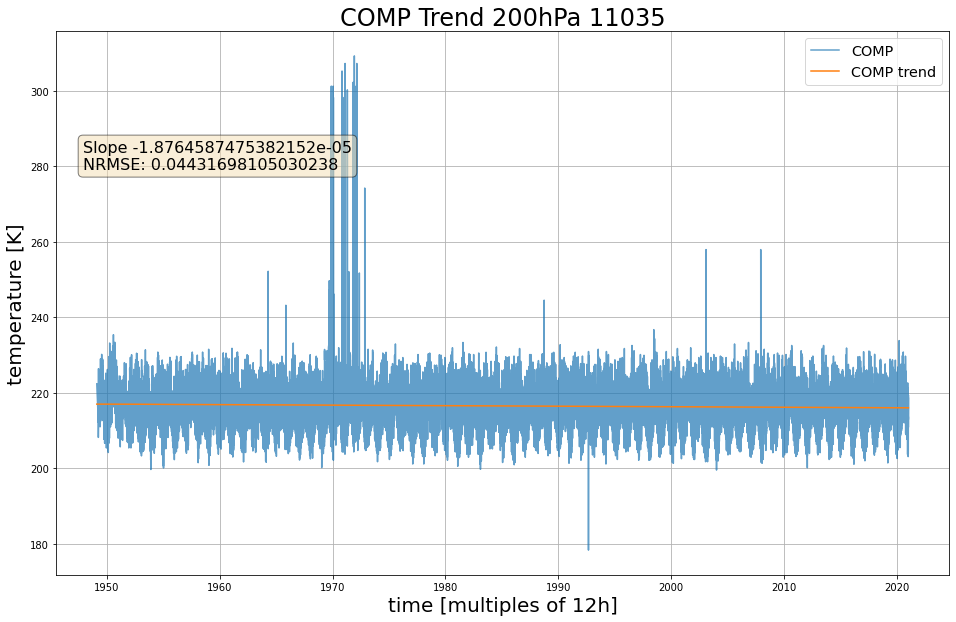

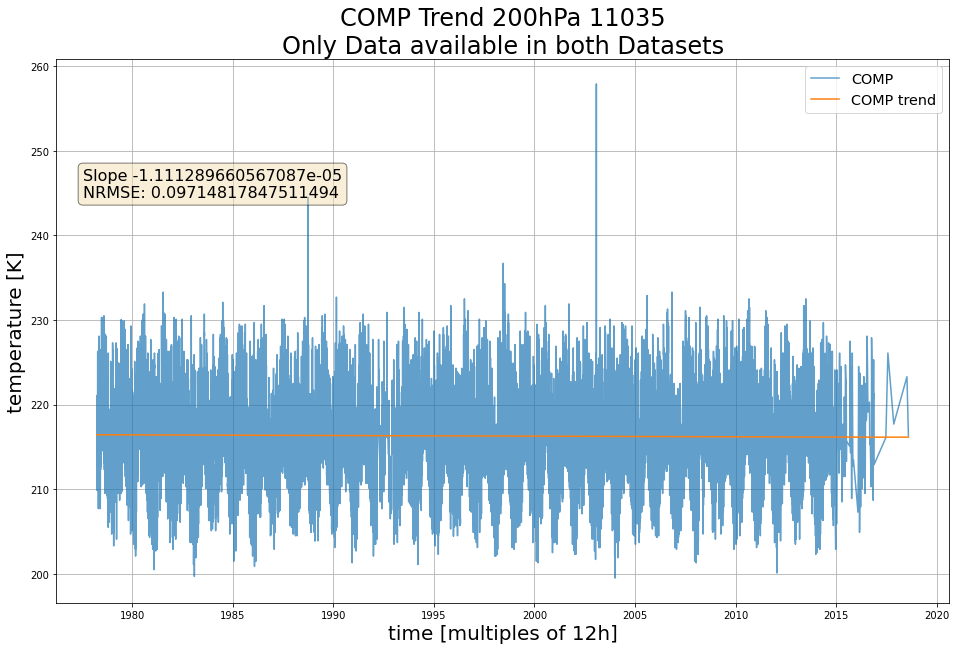

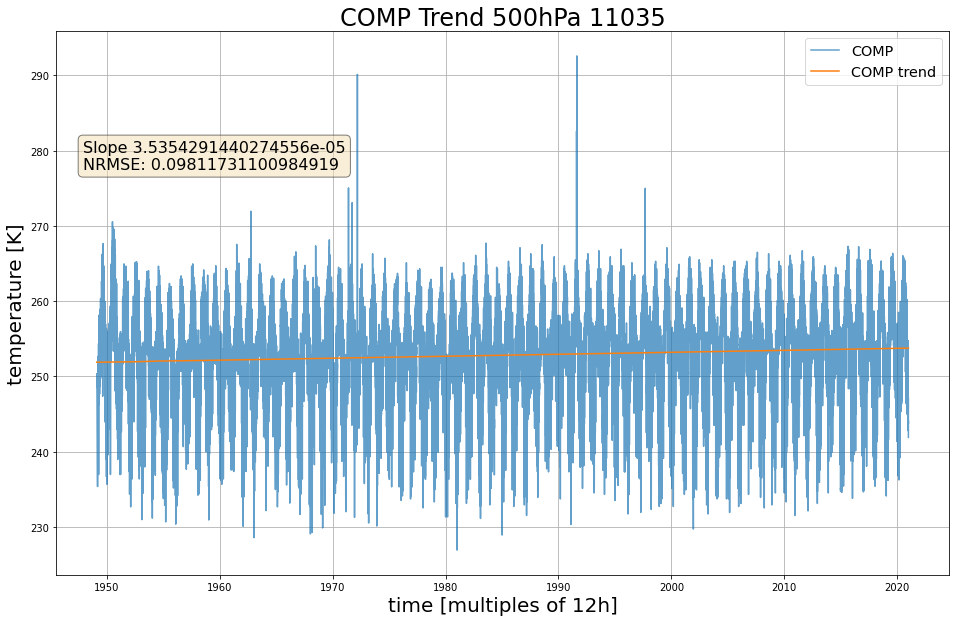

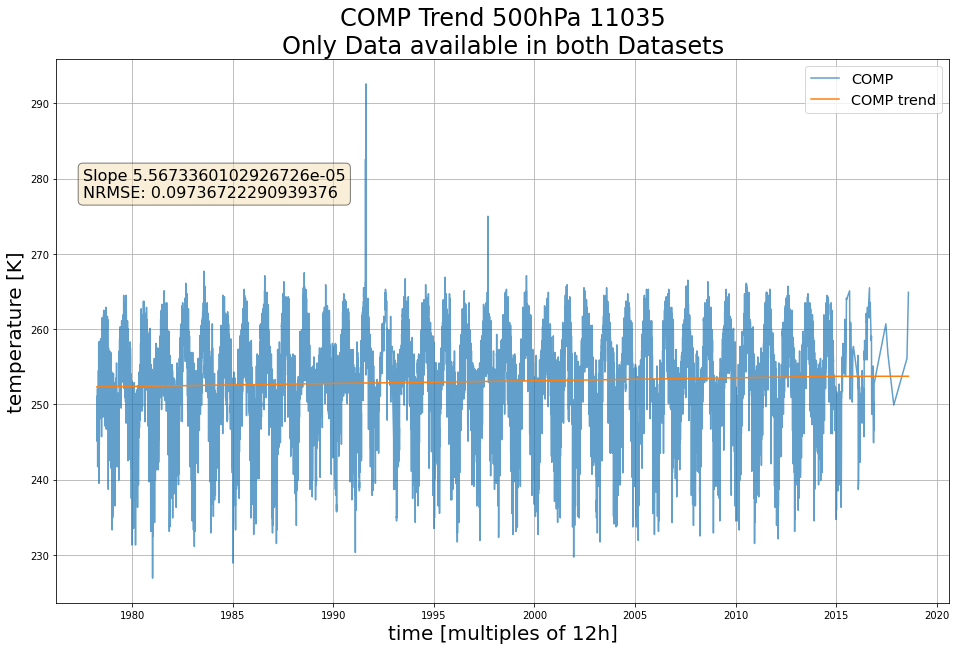

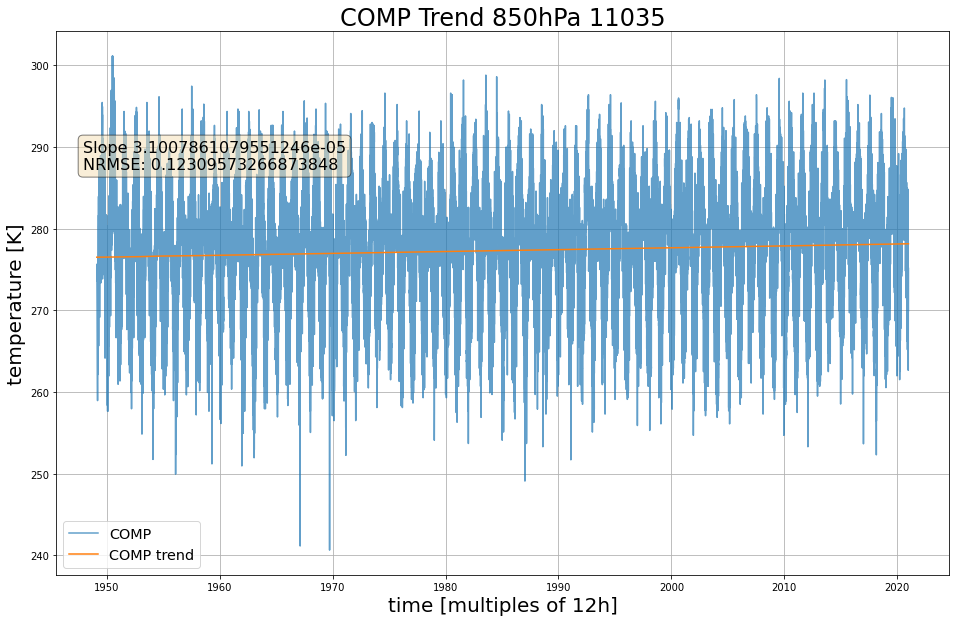

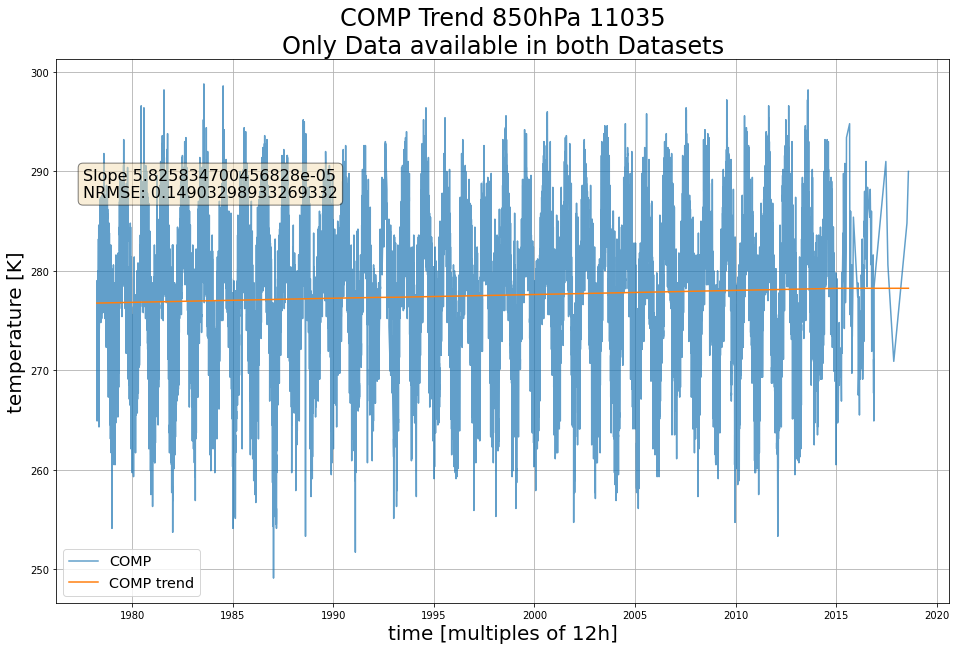

In [19]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_original[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

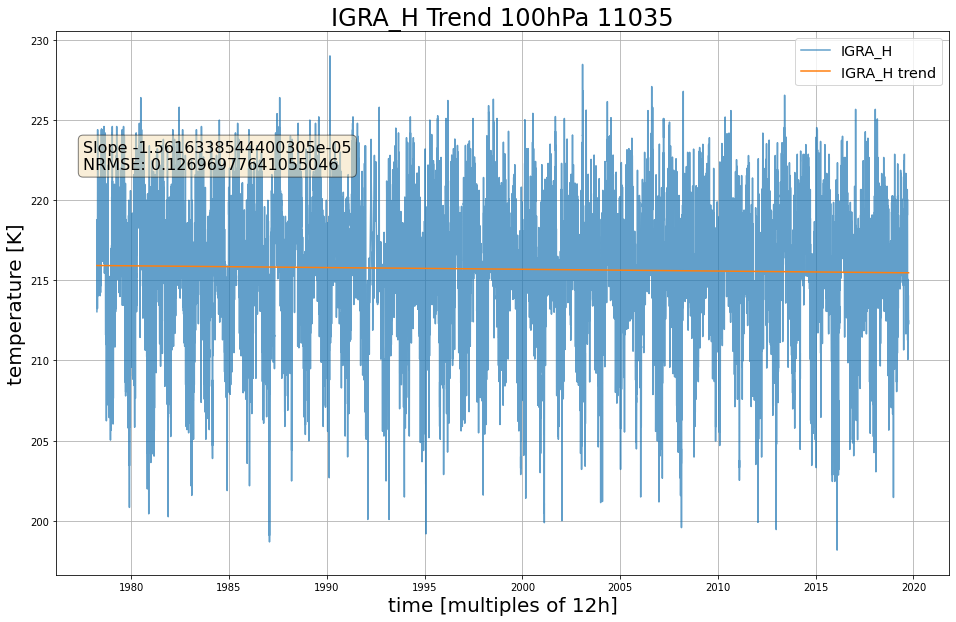

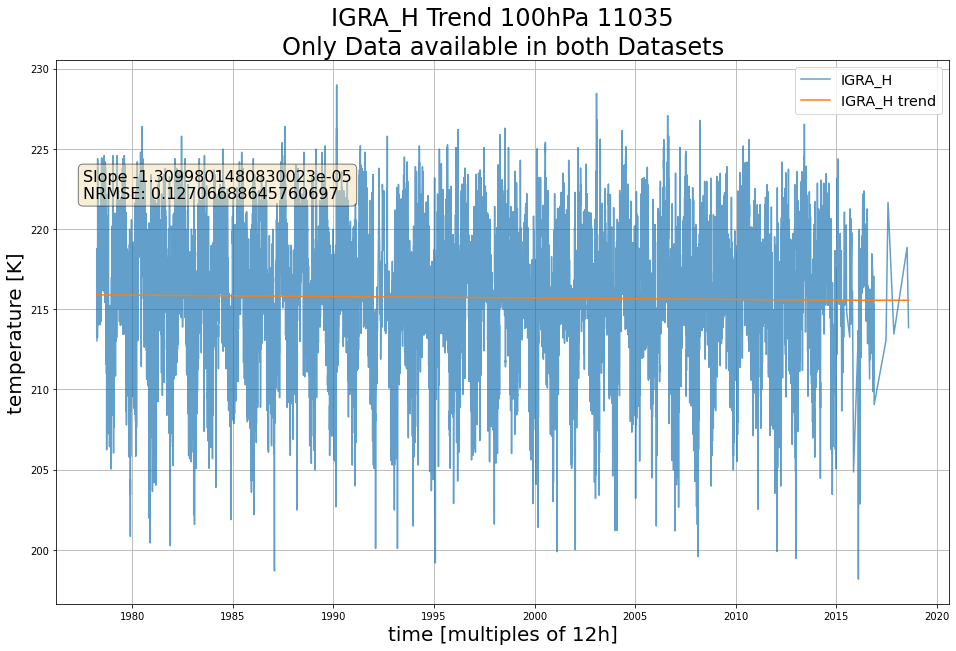

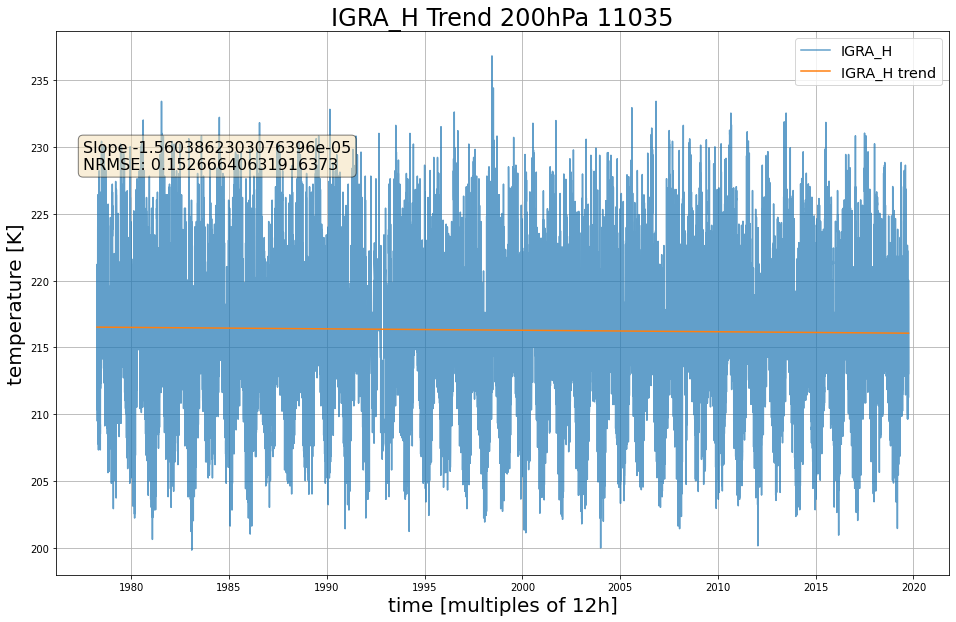

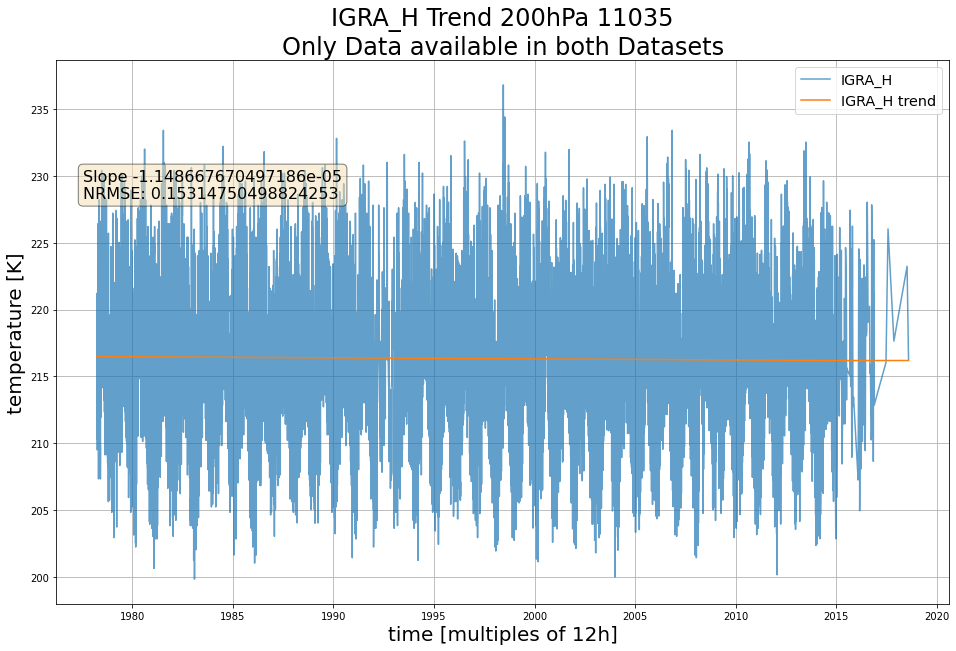

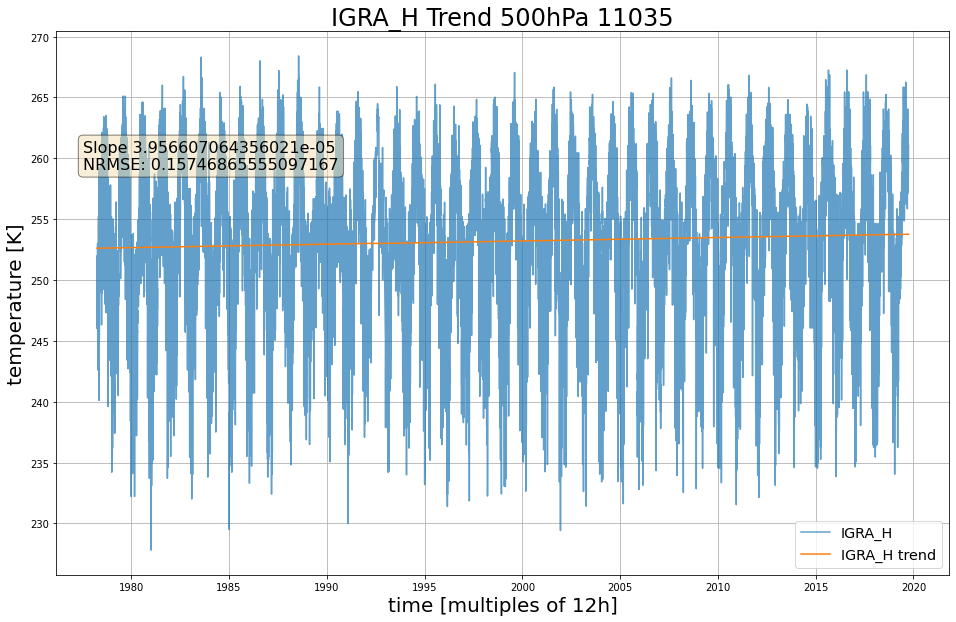

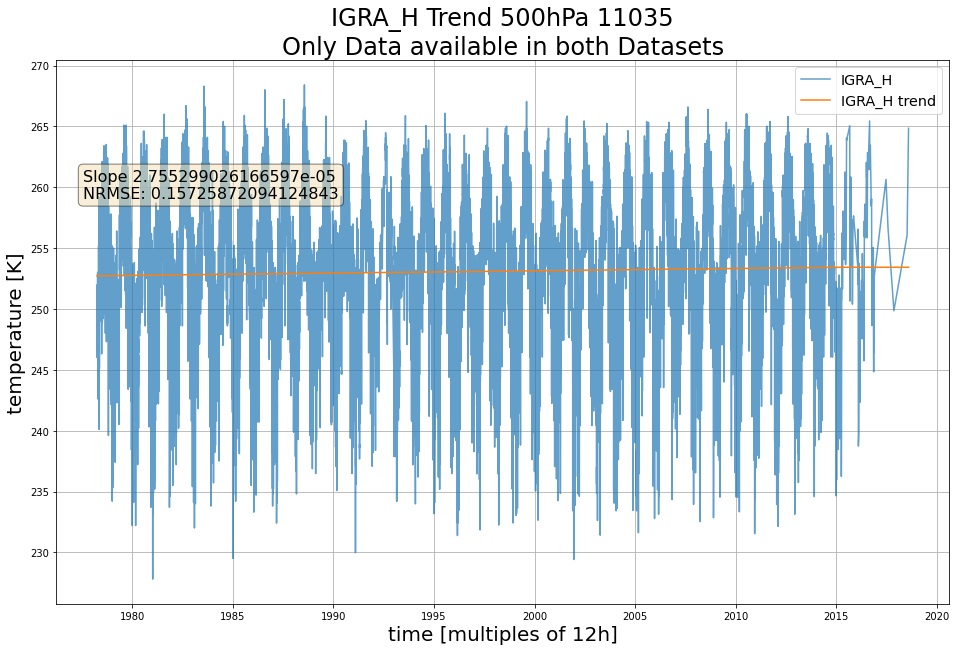

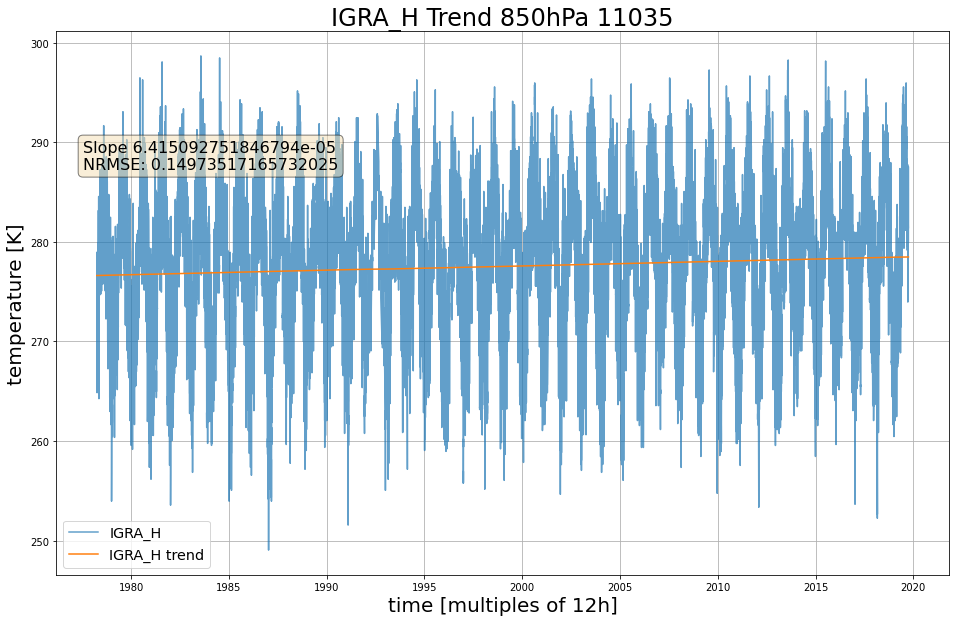

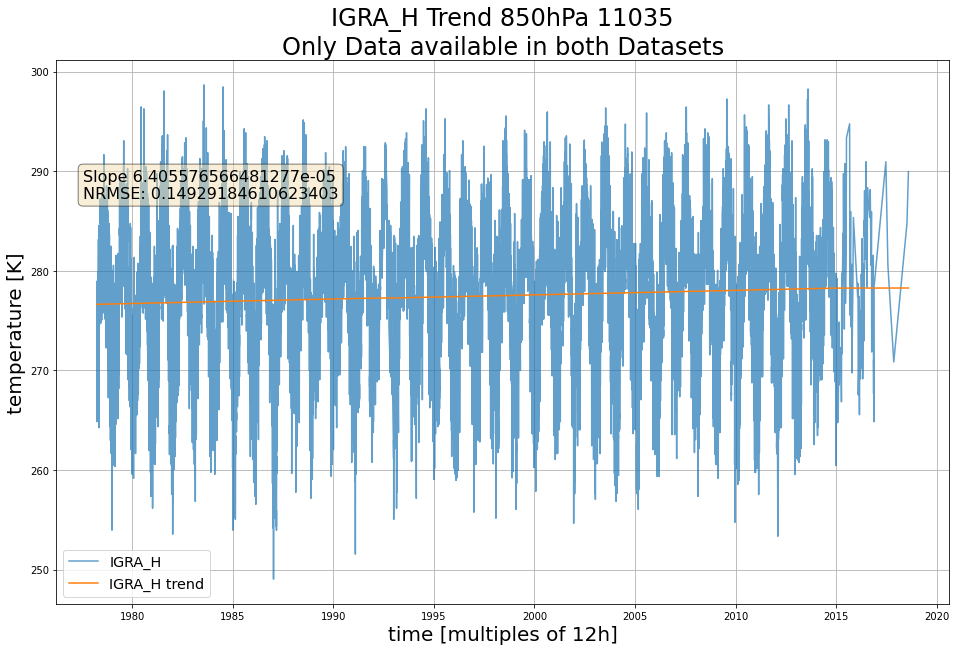

In [20]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = igrah_original[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = igra_h_adjusted[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [21]:
# reduced data
#
comp_ma = []
igra_h_ma = []
igra_ma = []

for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

In [22]:
# original data
#
comp_o_ma = []
igrah_o_ma = []
igra_o_ma = []

for i in range(len(comp_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_original[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_o_ma.append(comp_original[i])
    comp_o_ma[i].ta = comp_o_ma[i].ta - rm

    
for i in range(len(igra_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(igra_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_o_ma.append(igra_original[i])
    igra_o_ma[i].air_temperature = igra_o_ma[i].air_temperature - rm
    
    datain = np.asarray(igrah_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igrah_o_ma.append(igrah_original[i])
    igrah_o_ma[i].air_temperature = igrah_o_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

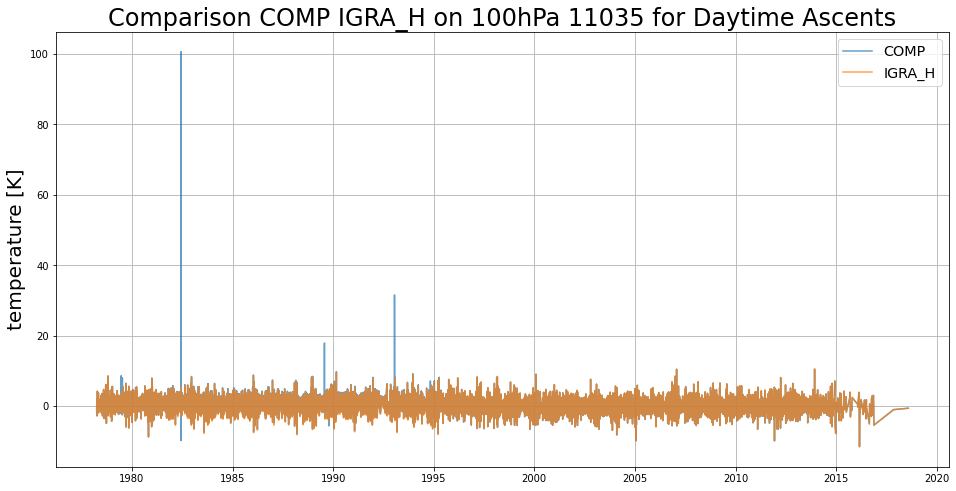

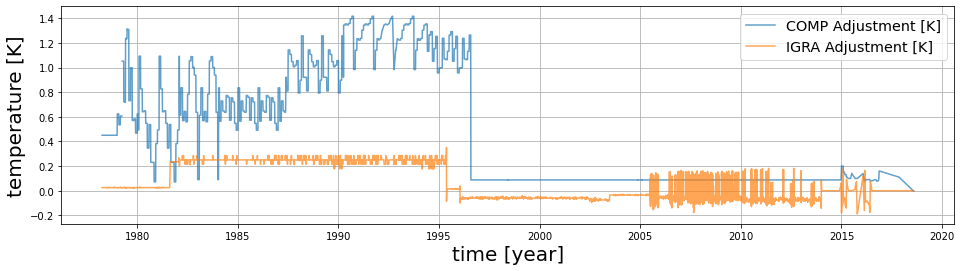

COMP Adjustment MEAN: 0.47397253
COMP Adjustment MIN: -0.00375
COMP Adjustment MAX: 1.4166778
IGRA Adjustment MEAN: 0.06280484707852849
IGRA Adjustment MIN: -0.18857574462890625
IGRA Adjustment MAX: 0.3507145472935349


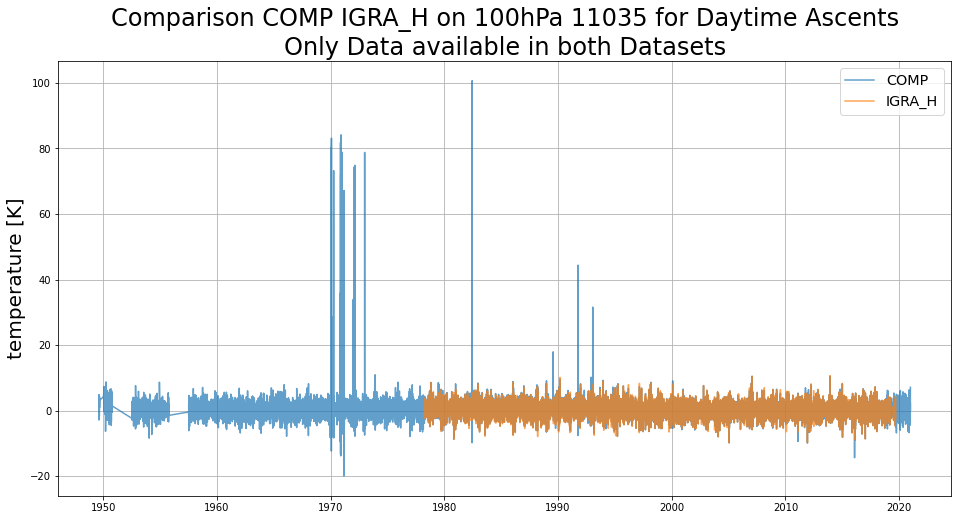

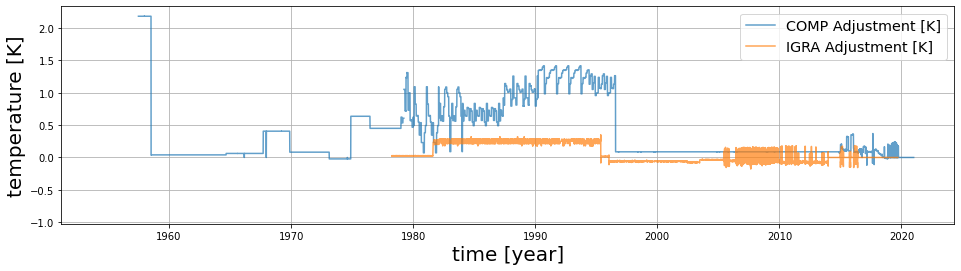

COMP Adjustment MEAN: 0.37869647
COMP Adjustment MIN: -0.87234485
COMP Adjustment MAX: 2.1823912
IGRA Adjustment MEAN: 0.05482907184679766
IGRA Adjustment MIN: -0.17857251848494116
IGRA Adjustment MAX: 0.3507145472935349


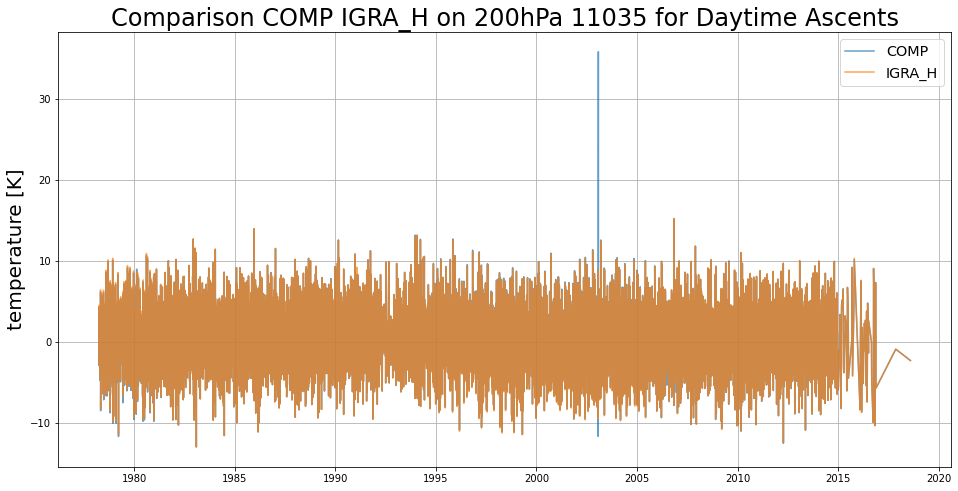

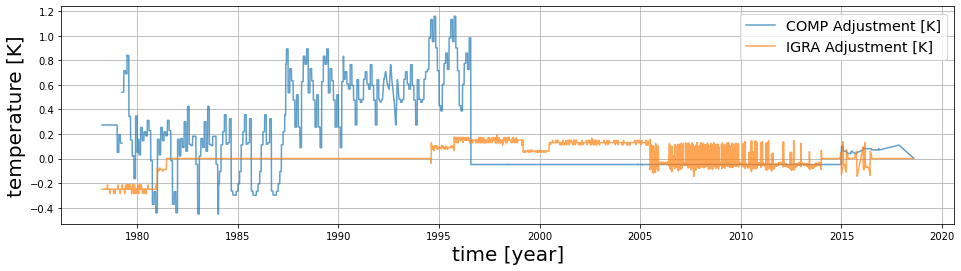

COMP Adjustment MEAN: 0.13921745
COMP Adjustment MIN: -0.450769
COMP Adjustment MAX: 1.1582059
IGRA Adjustment MEAN: 0.006271206480581991
IGRA Adjustment MIN: -0.285727364676319
IGRA Adjustment MAX: 0.1928536551339164


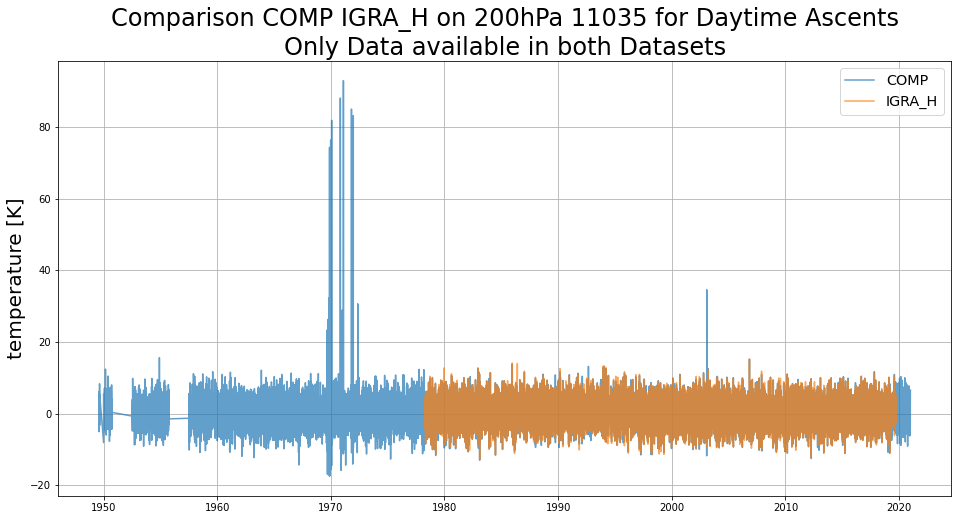

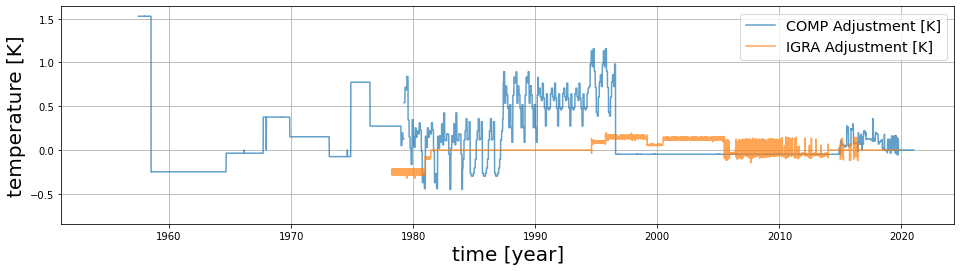

COMP Adjustment MEAN: 0.13650015
COMP Adjustment MIN: -0.73013306
COMP Adjustment MAX: 1.528239
IGRA Adjustment MEAN: 0.004902659965935016
IGRA Adjustment MIN: -0.3214242117745414
IGRA Adjustment MAX: 0.19285474504744116


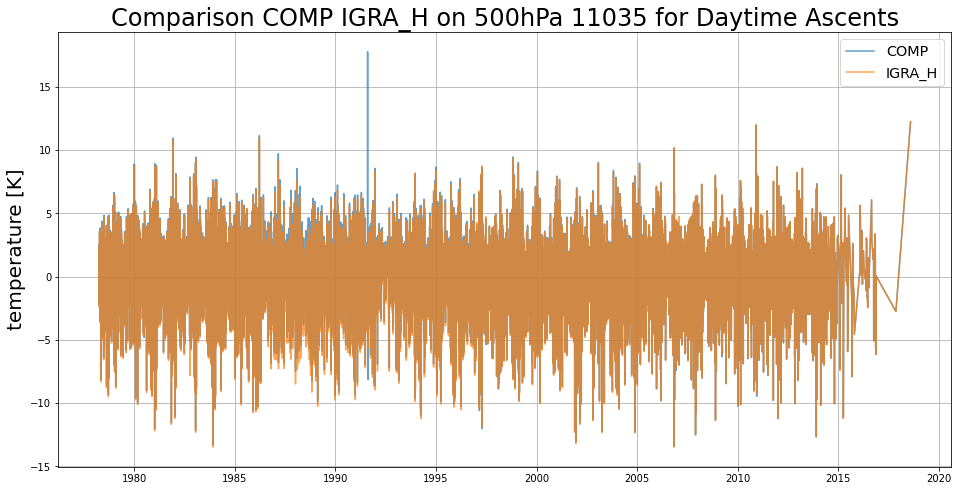

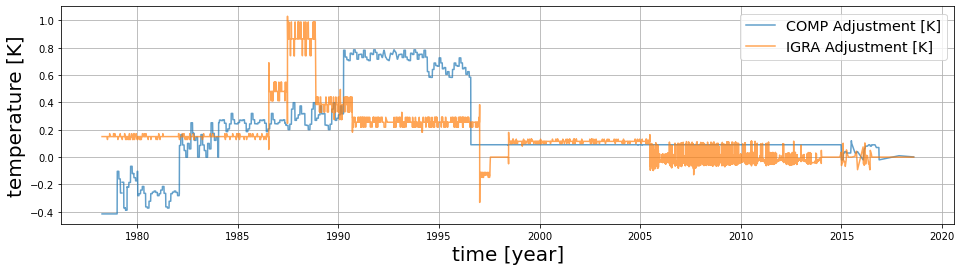

COMP Adjustment MEAN: 0.17463237
COMP Adjustment MIN: -0.4154892
COMP Adjustment MAX: 0.7844114
IGRA Adjustment MEAN: 0.15166979970108105
IGRA Adjustment MIN: -0.3314296177455276
IGRA Adjustment MAX: 1.0300020490373925


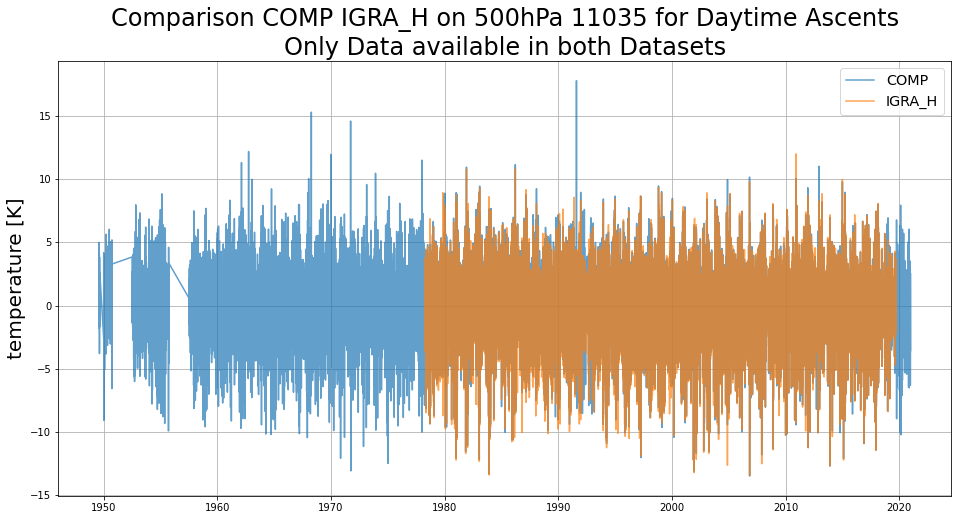

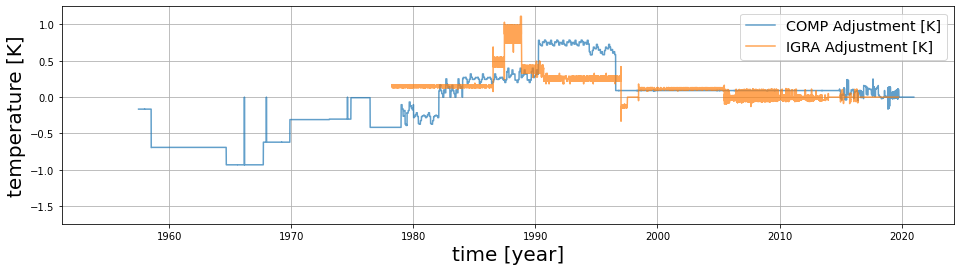

COMP Adjustment MEAN: -0.048838228
COMP Adjustment MIN: -1.6058842
COMP Adjustment MAX: 0.7844114
IGRA Adjustment MEAN: 0.13560071922885805
IGRA Adjustment MIN: -0.3314296177455276
IGRA Adjustment MAX: 1.1121575491769136


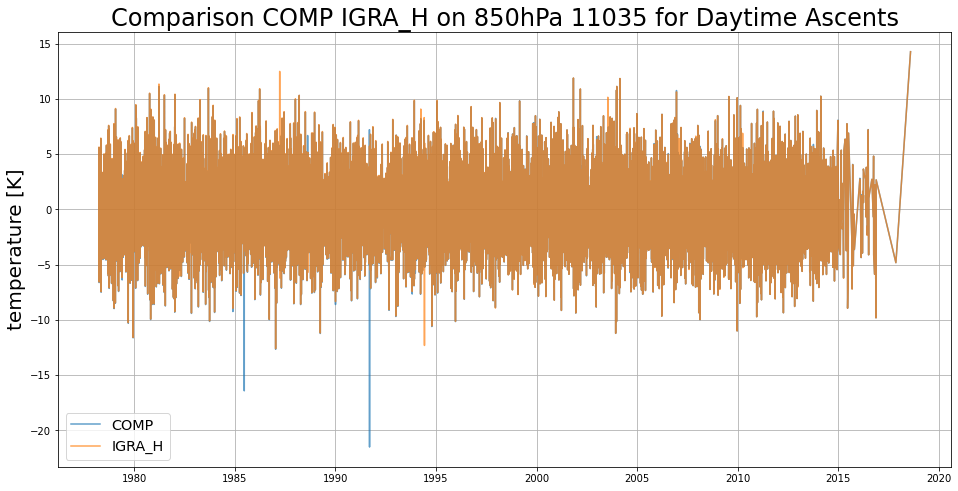

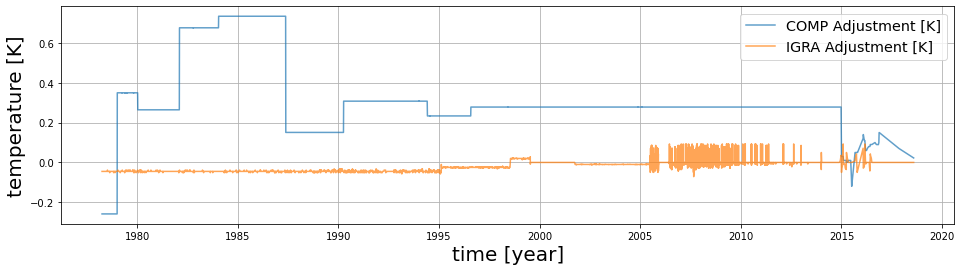

COMP Adjustment MEAN: 0.3213212
COMP Adjustment MIN: -0.2586051
COMP Adjustment MAX: 0.734435
IGRA Adjustment MEAN: -0.022791553093542524
IGRA Adjustment MIN: -0.07143293108254056
IGRA Adjustment MAX: 0.09286063058044647


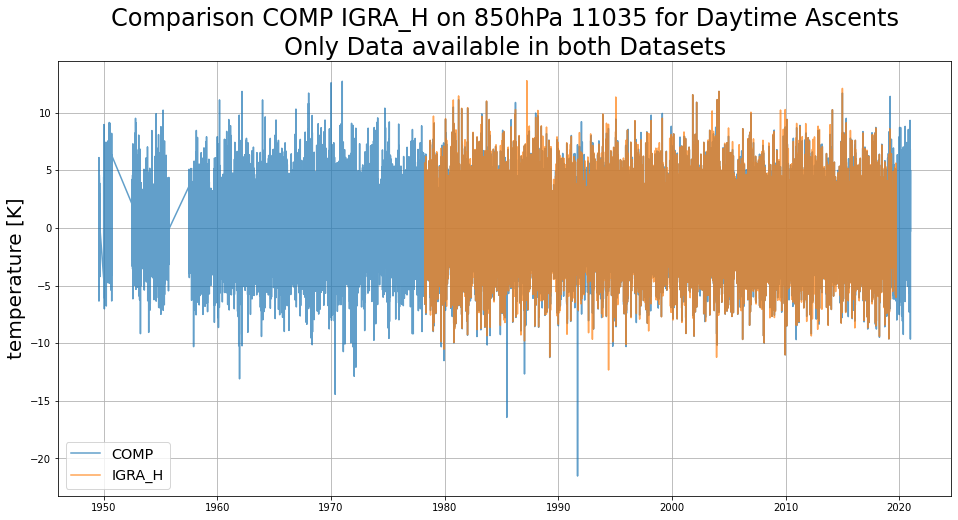

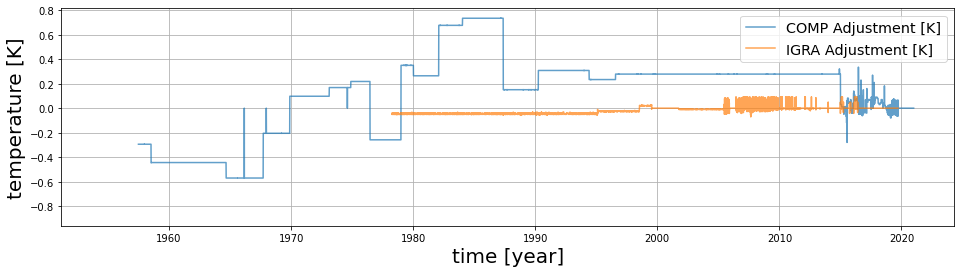

COMP Adjustment MEAN: 0.12137184
COMP Adjustment MIN: -0.8801805
COMP Adjustment MAX: 0.734435
IGRA Adjustment MEAN: -0.02041441493661742
IGRA Adjustment MIN: -0.07143293108254056
IGRA Adjustment MAX: 0.09286281040738231


In [23]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6]
    a = a[a.report_timestamp.dt.hour < 18]
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6]
    b = b[b.report_timestamp.dt.hour < 18]
    c = comp_o_ma[i]
    c = c[c.time.dt.hour >= 6]
    c = c[c.time.dt.hour < 18]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

In [24]:
a = igra_o_ma[0]
a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour > 18])

station_name    report_timestamp  report_id  longitude  latitude  \
17       AUM00011035 1978-04-01 00:00:00   28176112    16.3564   48.2486   
95       AUM00011035 1978-04-02 00:00:00   28176143    16.3564   48.2486   
175      AUM00011035 1978-04-03 00:00:00   28176174    16.3564   48.2486   
244      AUM00011035 1978-04-04 00:00:00   28176201    16.3564   48.2486   
329      AUM00011035 1978-04-05 00:00:00   28176239    16.3564   48.2486   
...              ...                 ...        ...        ...       ...   
2201457  AUM00011035 2019-09-27 00:00:00   28172745    16.3564   48.2486   
2201772  AUM00011035 2019-09-29 00:00:00   28172852    16.3564   48.2486   
2201884  AUM00011035 2019-09-30 00:00:00   28172897    16.3564   48.2486   
2202062  AUM00011035 2019-10-01 00:00:00   28172966    16.3564   48.2486   
1678695  AUM00011035 2012-11-09 23:00:00   28147426    16.3564   48.2486   

         air_pressure  air_temperature             actual_time  \
17            10000.0        -2.957147  1978-04-01 00:00:00+00   
95            10000.0        -1.757150  1978-04-02 00:00:00+00   
175           10000.0         0.042853  1978-04-03 00:00:00+00   
244           10000.0         0.442862  1978-04-04 00:00:00+00   
329           10000.0        -0.728567  1978-04-05 00:00:00+00   
...               ...              ...                     ...   
2201457       10000.0         1.428573  2019-09-26 23:31:00+00   
2201772       10000.0         0.228576  2019-09-28 23:30:00+00   
2201884       10000.0        -0.371431  2019-09-29 23:30:00+00   
2202062       10000.0        -0.171434  2019-09-30 23:30:00+00   
1678695       10000.0        -2.828566  2012-11-09 23:29:00+00   

         height_of_station_above_sea_level  
17                                   200.0  
95                                   200.0  
175                                  200.0  
244                                  200.0  
329                                  200.0  
...                                    ...  
2201457                              200.0  
2201772                              200.0  
2201884                              200.0  
2202062                              200.0  
1678695                              200.0  

[14519 rows x 9 columns]

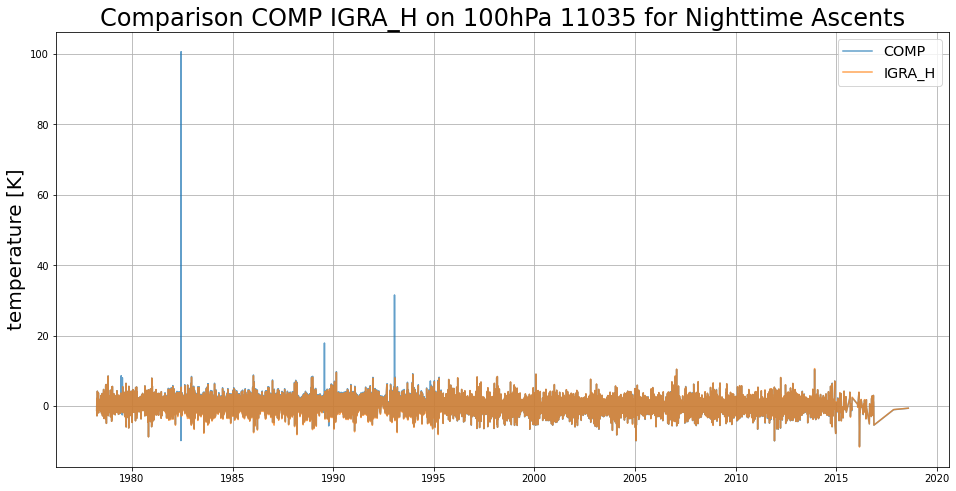

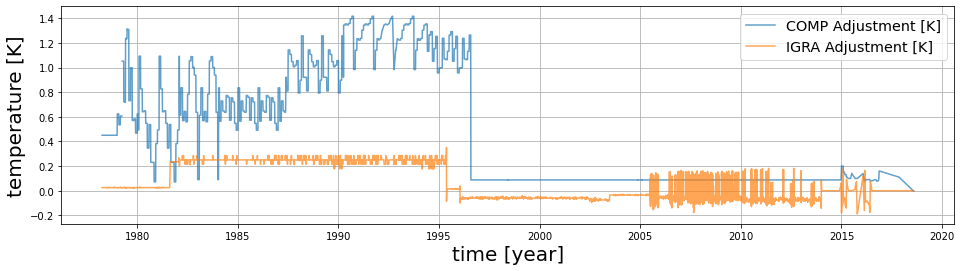

COMP Adjustment MEAN: 0.47397253
COMP Adjustment MIN: -0.00375
COMP Adjustment MAX: 1.4166778
IGRA Adjustment MEAN: 0.06280484707852849
IGRA Adjustment MIN: -0.18857574462890625
IGRA Adjustment MAX: 0.3507145472935349


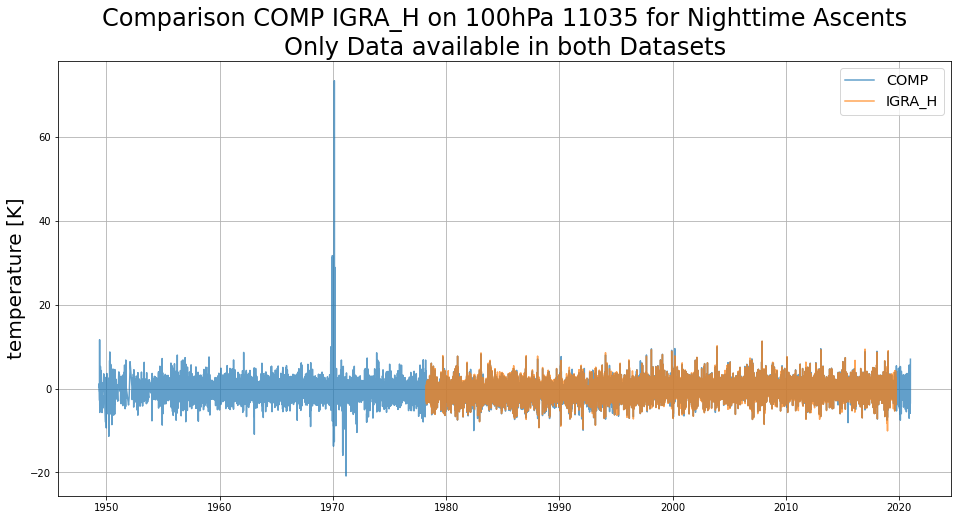

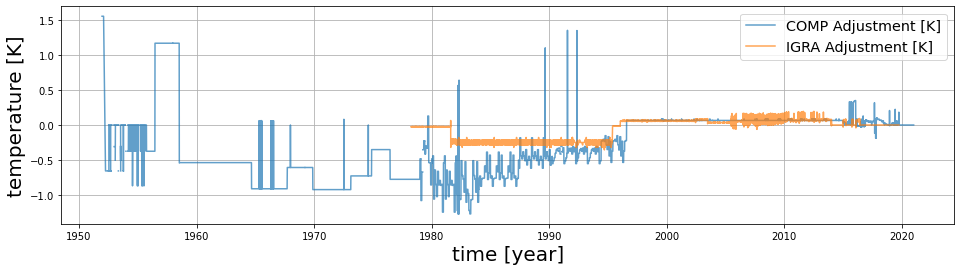

COMP Adjustment MEAN: -0.3002224
COMP Adjustment MIN: -1.2750107
COMP Adjustment MAX: 1.5593988
IGRA Adjustment MEAN: -0.05444496312953645
IGRA Adjustment MIN: -0.3571428571428612
IGRA Adjustment MAX: 0.1964307512555763


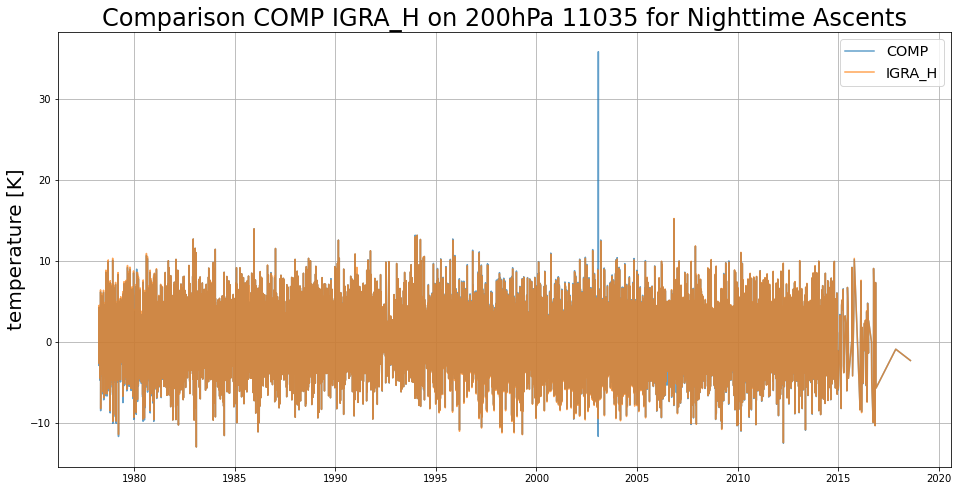

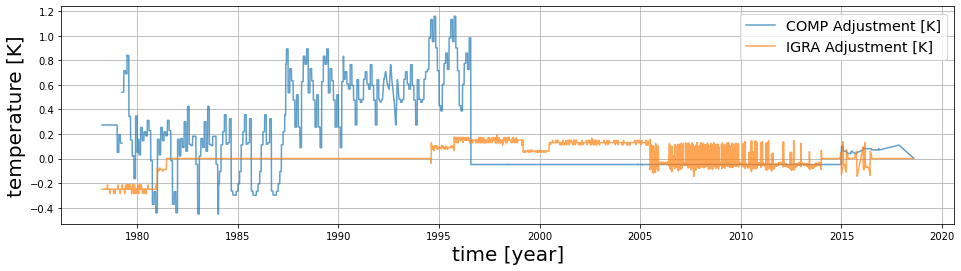

COMP Adjustment MEAN: 0.13921745
COMP Adjustment MIN: -0.450769
COMP Adjustment MAX: 1.1582059
IGRA Adjustment MEAN: 0.006271206480581991
IGRA Adjustment MIN: -0.285727364676319
IGRA Adjustment MAX: 0.1928536551339164


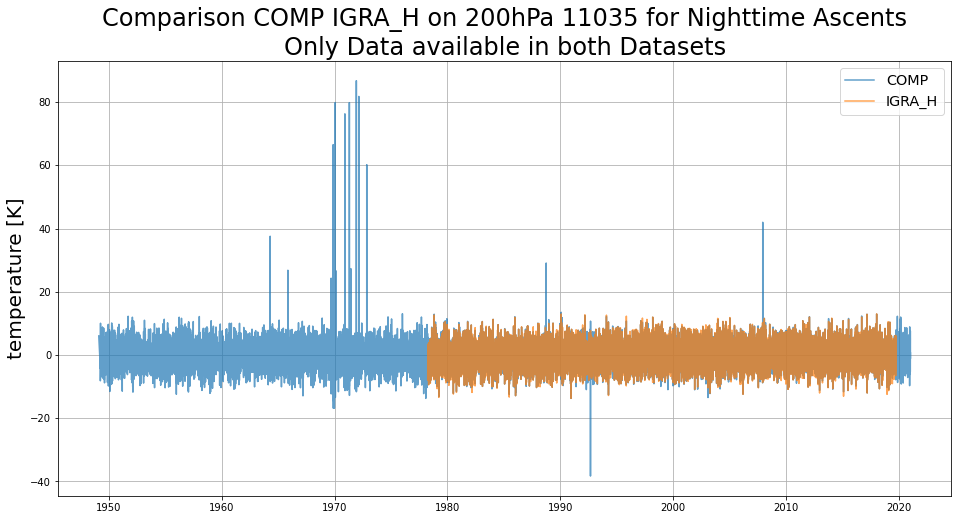

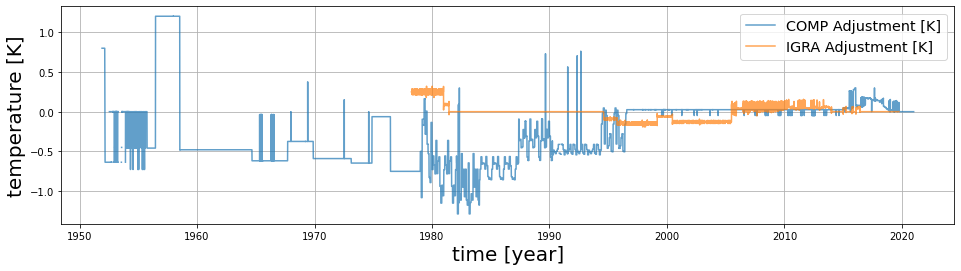

COMP Adjustment MEAN: -0.257663
COMP Adjustment MIN: -1.2905188
COMP Adjustment MAX: 1.2043432
IGRA Adjustment MEAN: -0.004862453344093056
IGRA Adjustment MIN: -0.19286782400948255
IGRA Adjustment MAX: 0.3214220319475487


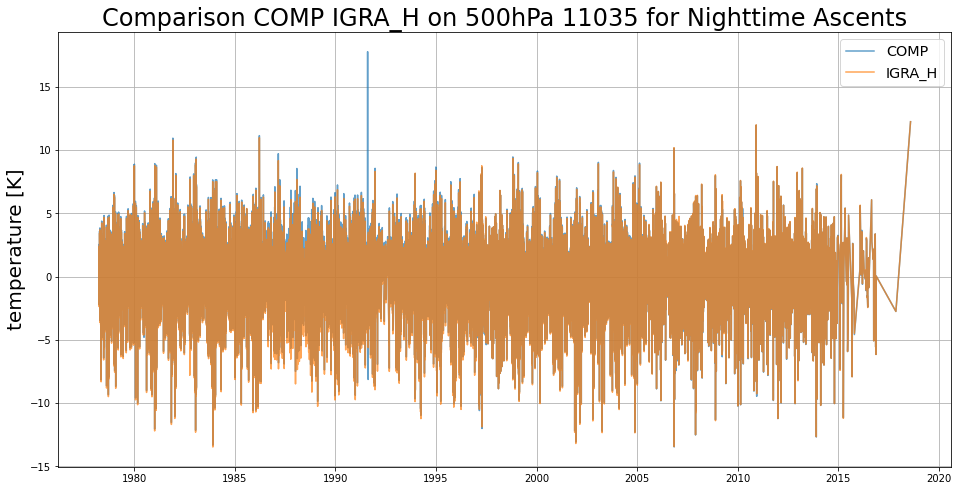

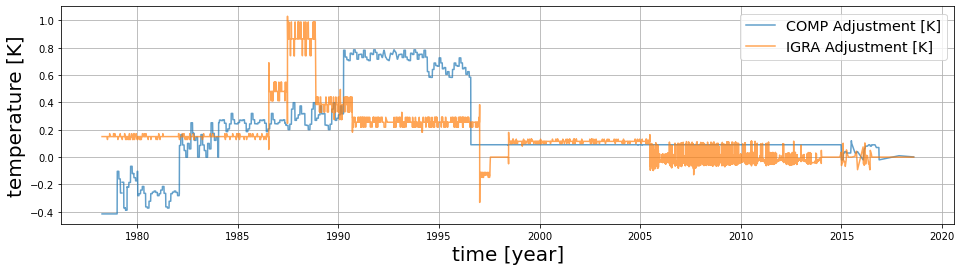

COMP Adjustment MEAN: 0.17463237
COMP Adjustment MIN: -0.4154892
COMP Adjustment MAX: 0.7844114
IGRA Adjustment MEAN: 0.15166979970108105
IGRA Adjustment MIN: -0.3314296177455276
IGRA Adjustment MAX: 1.0300020490373925


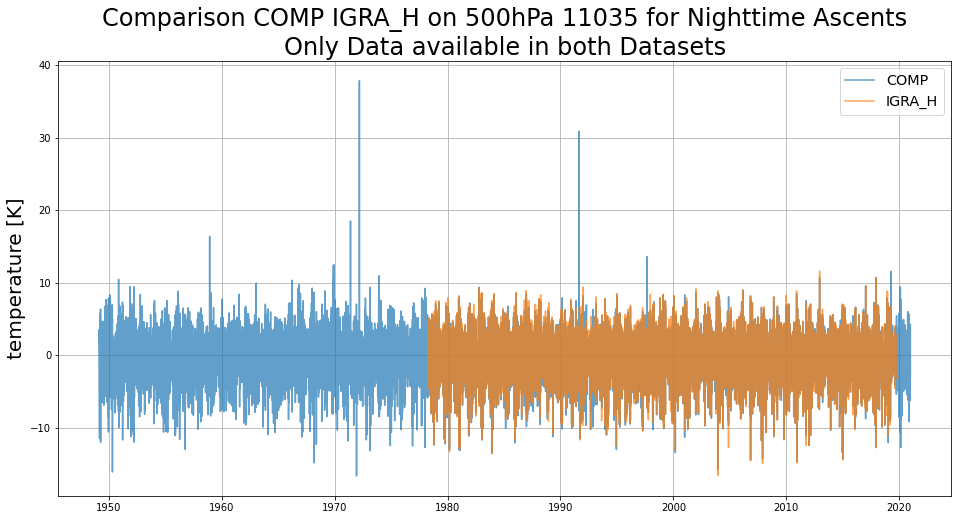

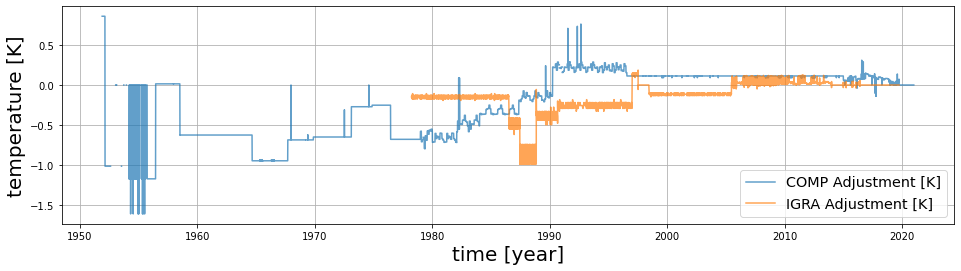

COMP Adjustment MEAN: -0.22062822
COMP Adjustment MIN: -1.6058842
COMP Adjustment MAX: 0.8563531
IGRA Adjustment MEAN: -0.13441479044179208
IGRA Adjustment MIN: -0.9886016845703693
IGRA Adjustment MAX: 0.1857234409877151


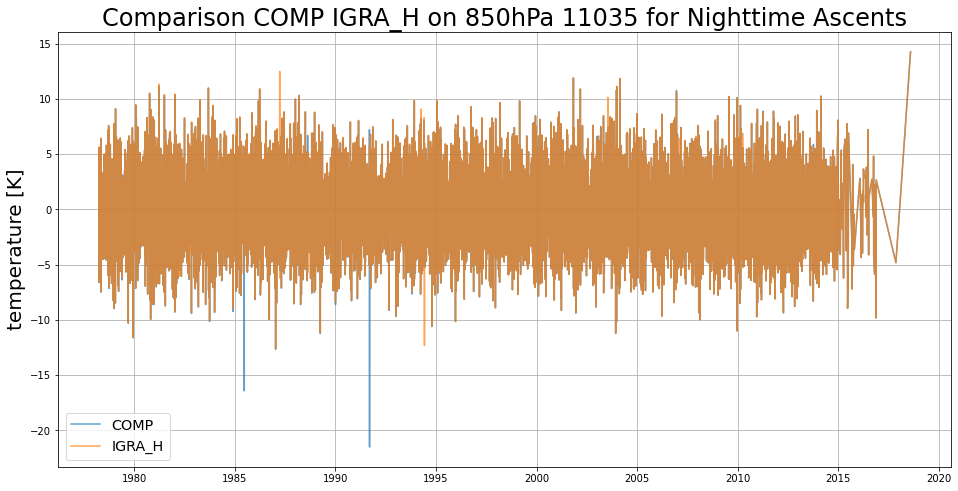

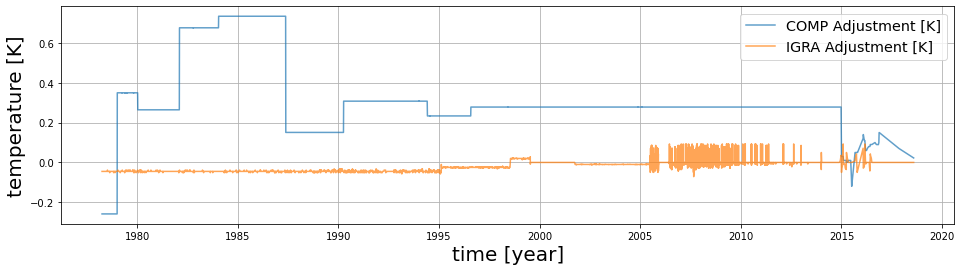

COMP Adjustment MEAN: 0.3213212
COMP Adjustment MIN: -0.2586051
COMP Adjustment MAX: 0.734435
IGRA Adjustment MEAN: -0.022791553093542524
IGRA Adjustment MIN: -0.07143293108254056
IGRA Adjustment MAX: 0.09286063058044647


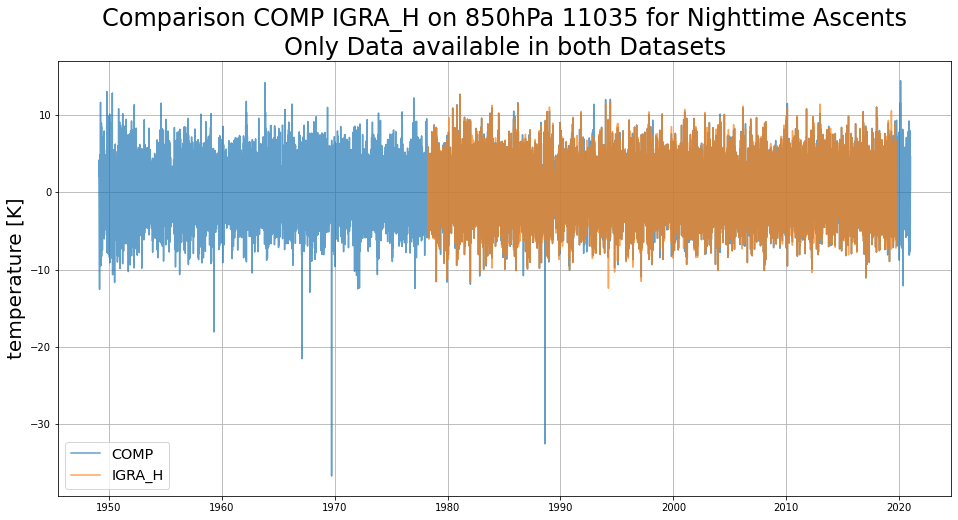

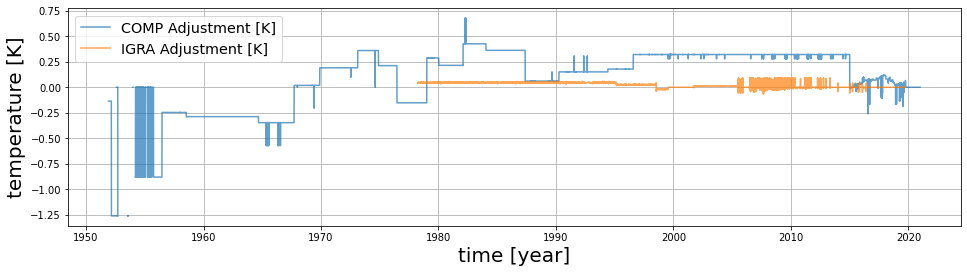

COMP Adjustment MEAN: 0.08925384
COMP Adjustment MIN: -1.260788
COMP Adjustment MAX: 0.6764052
IGRA Adjustment MEAN: 0.02024153978989618
IGRA Adjustment MIN: -0.06428963797435472
IGRA Adjustment MAX: 0.09286281040743916


In [25]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    c = comp_o_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >= 18]).sort_values('time')
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

## Difference:

Finding the difference between the two data sets by subtracting them.

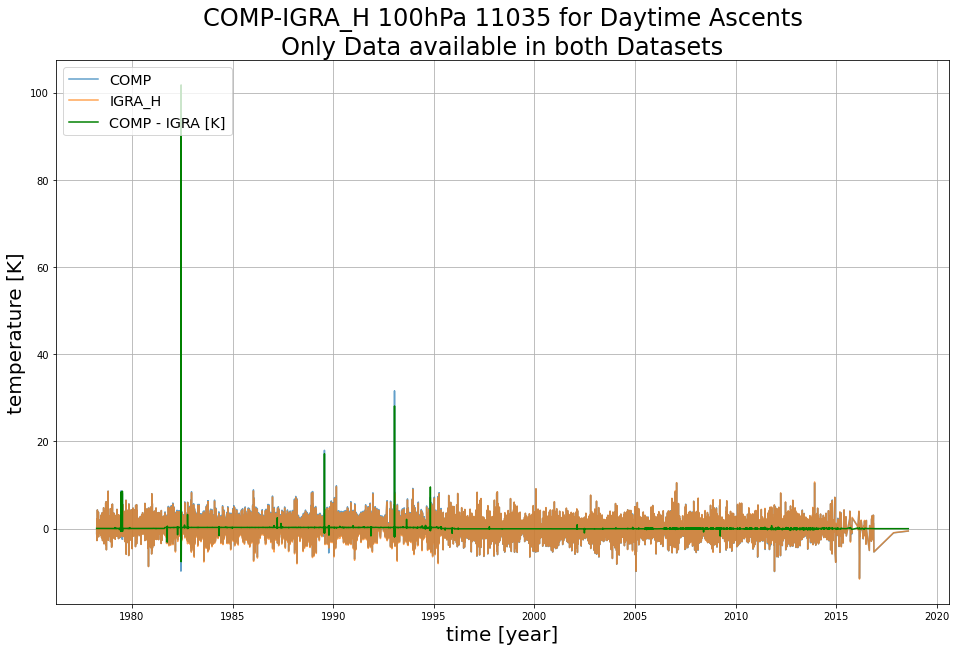

DIFF MEAN: 0.07081161370778176
DIFF MIN: -7.557155064174111
DIFF MAX: 101.7428468976702


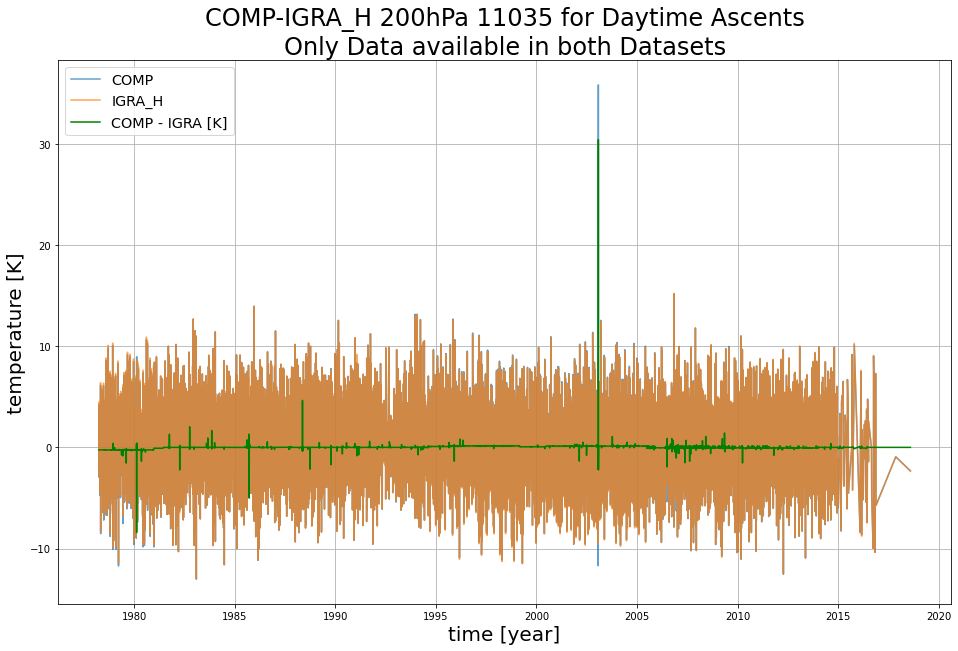

DIFF MEAN: 0.0065772194529250955
DIFF MIN: -8.421439034598194
DIFF MAX: 30.401419503348222


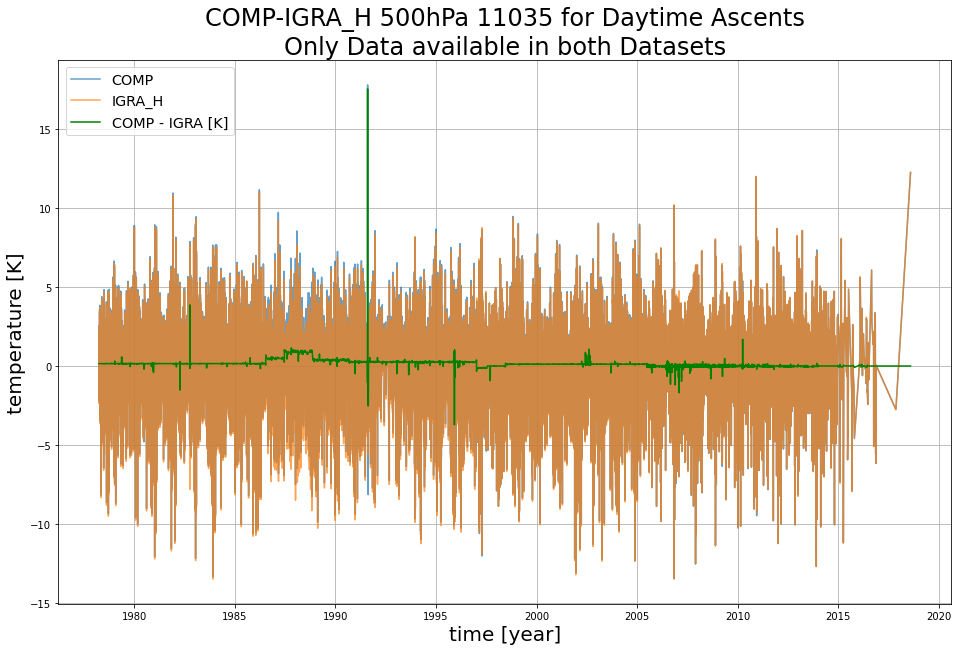

DIFF MEAN: 0.14808308257075087
DIFF MIN: -3.720711844308056
DIFF MAX: 17.526443481445312


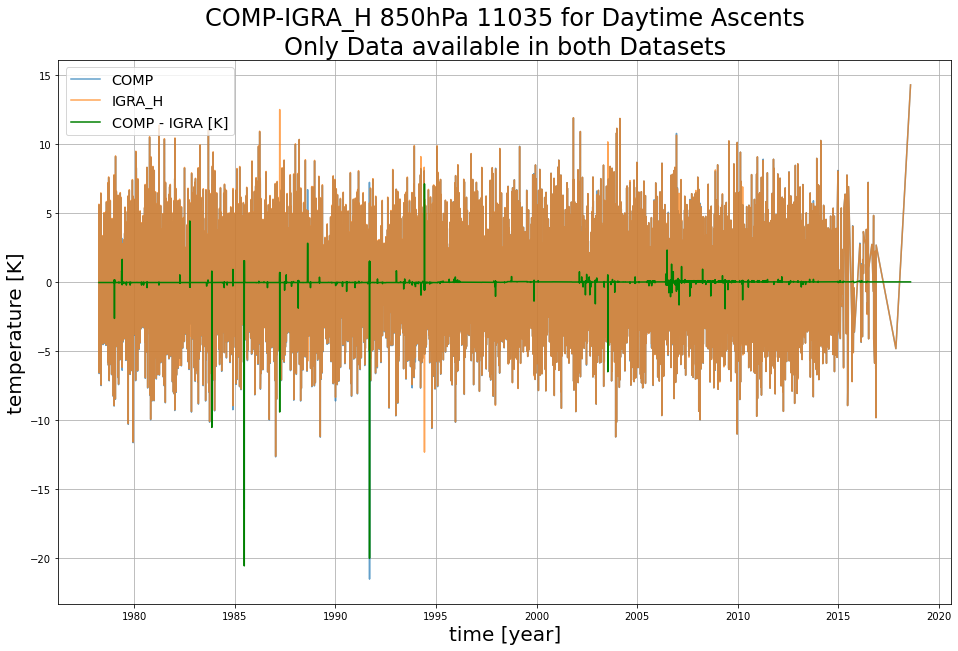

DIFF MEAN: -0.02418496922902785
DIFF MIN: -20.56641932896207
DIFF MAX: 7.09857177734375


In [26]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

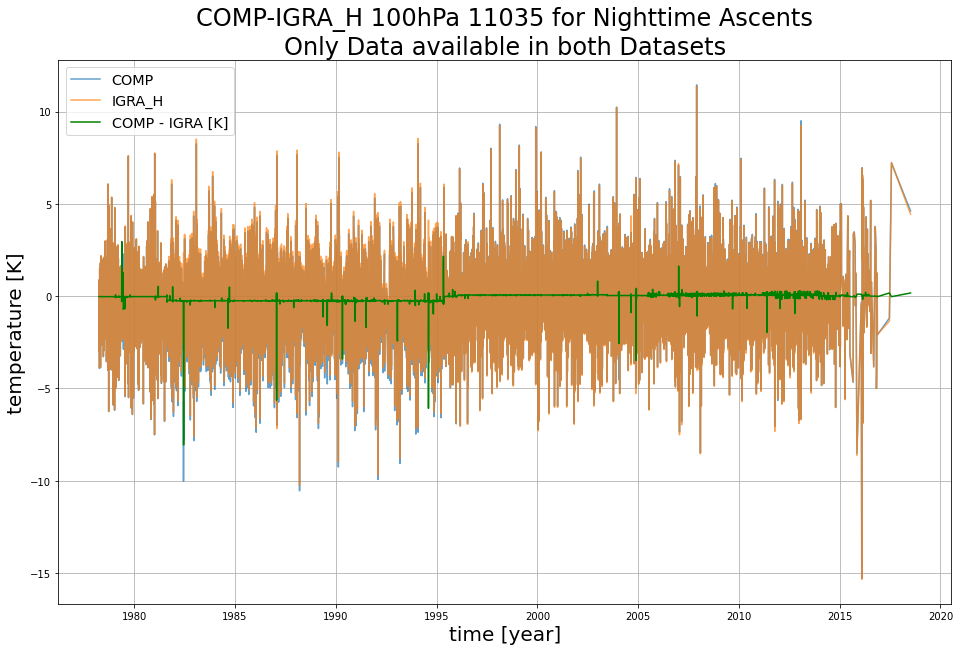

DIFF MEAN: -0.07114678062273101
DIFF MIN: -8.057141985212041
DIFF MAX: 2.9571402413504586


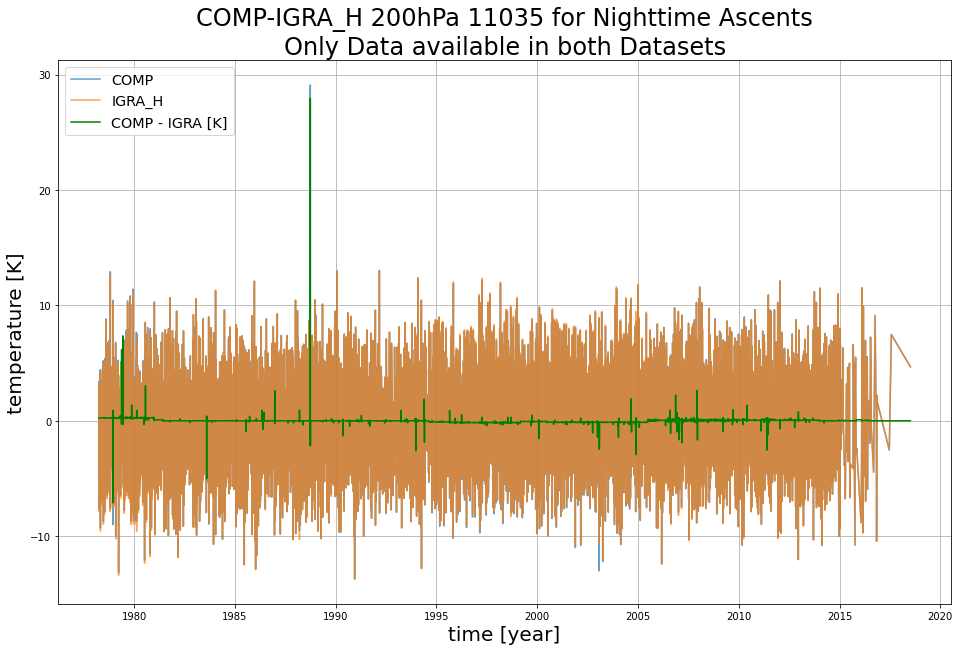

DIFF MEAN: -0.006562196088877159
DIFF MIN: -7.0928628104073255
DIFF MAX: 27.950000217982648


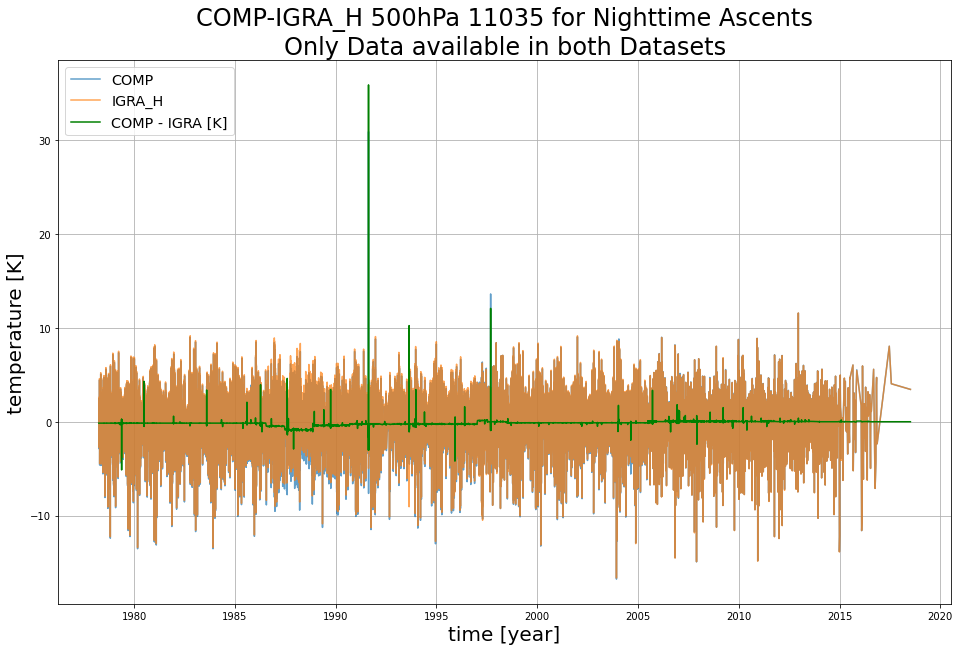

DIFF MEAN: -0.1479980977552321
DIFF MIN: -5.135704040527287
DIFF MAX: 35.866437639508945


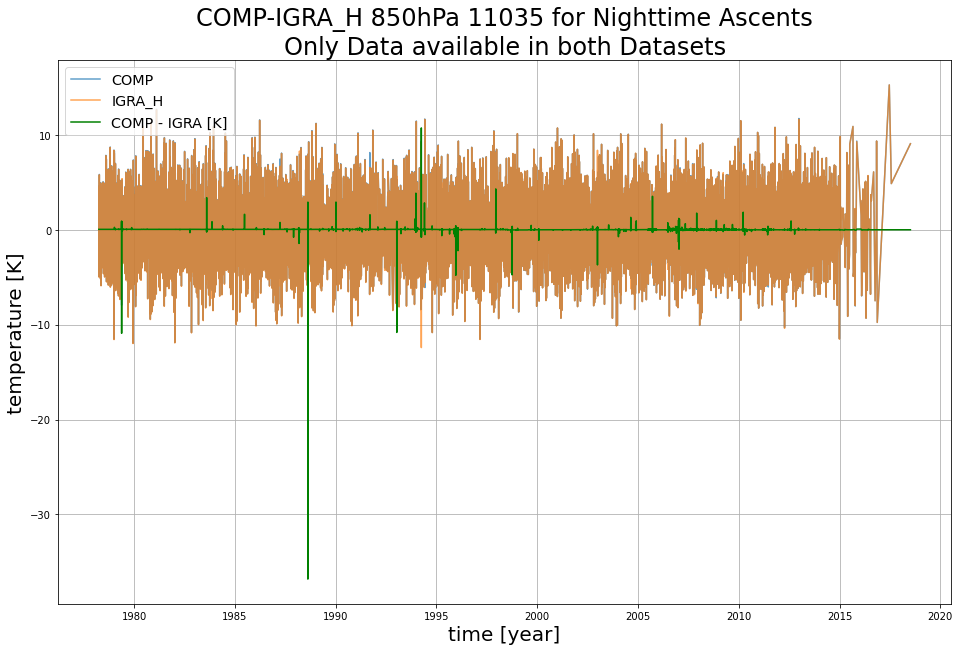

DIFF MEAN: 0.024202563483386674
DIFF MIN: -36.812838963099864
DIFF MAX: 10.730697631835938


In [27]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments

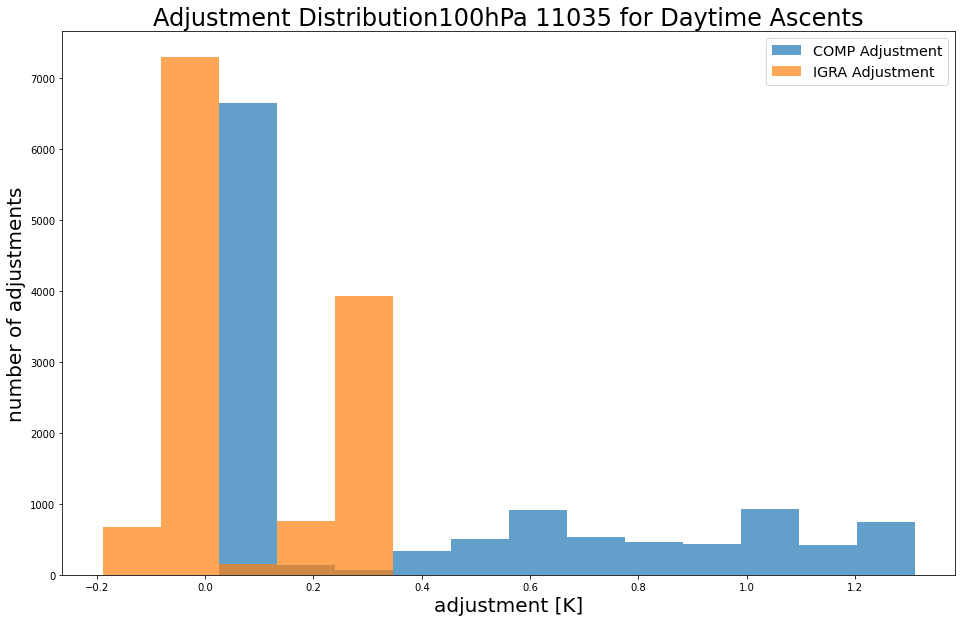

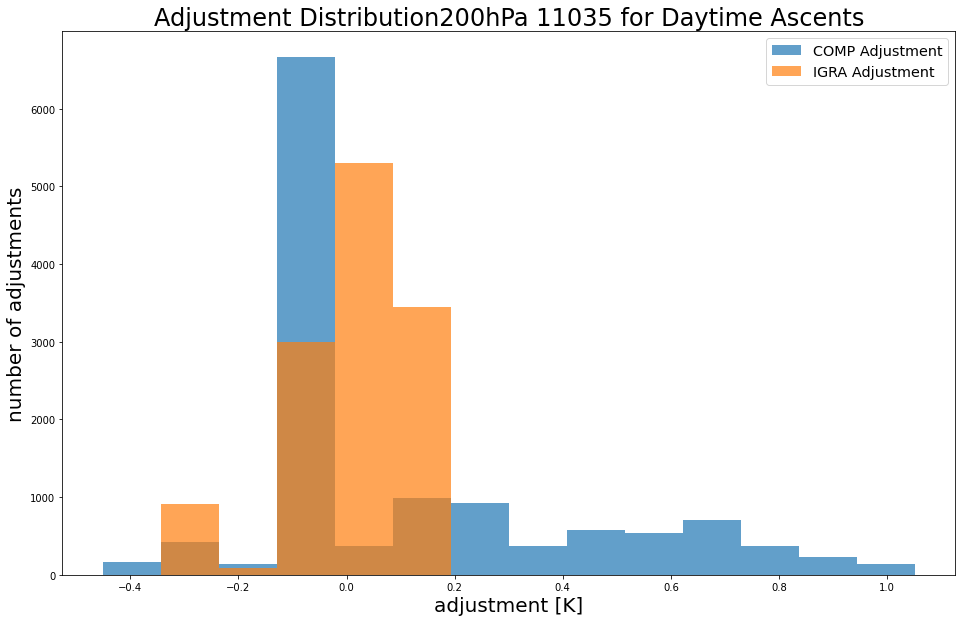

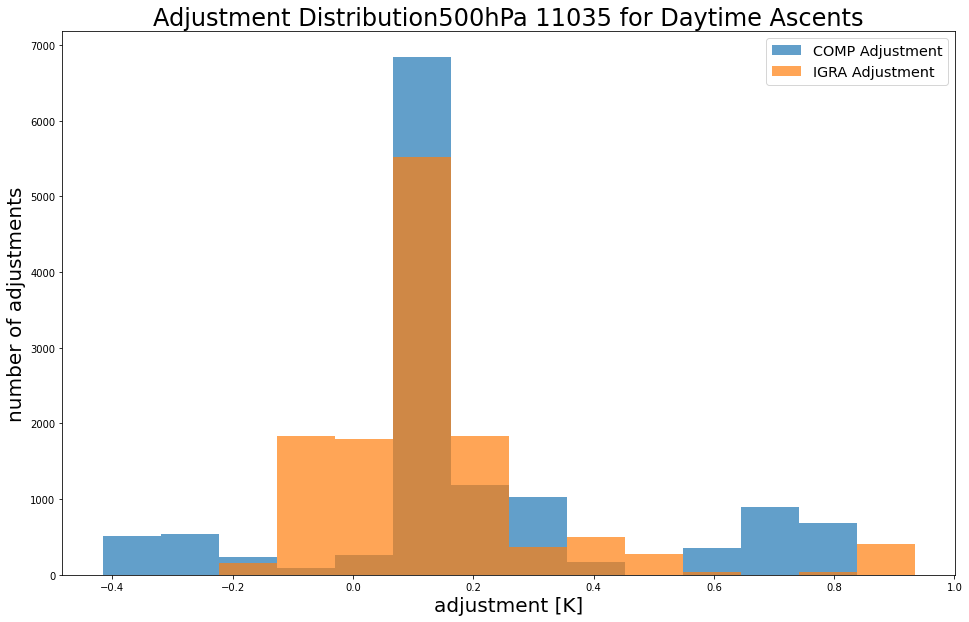

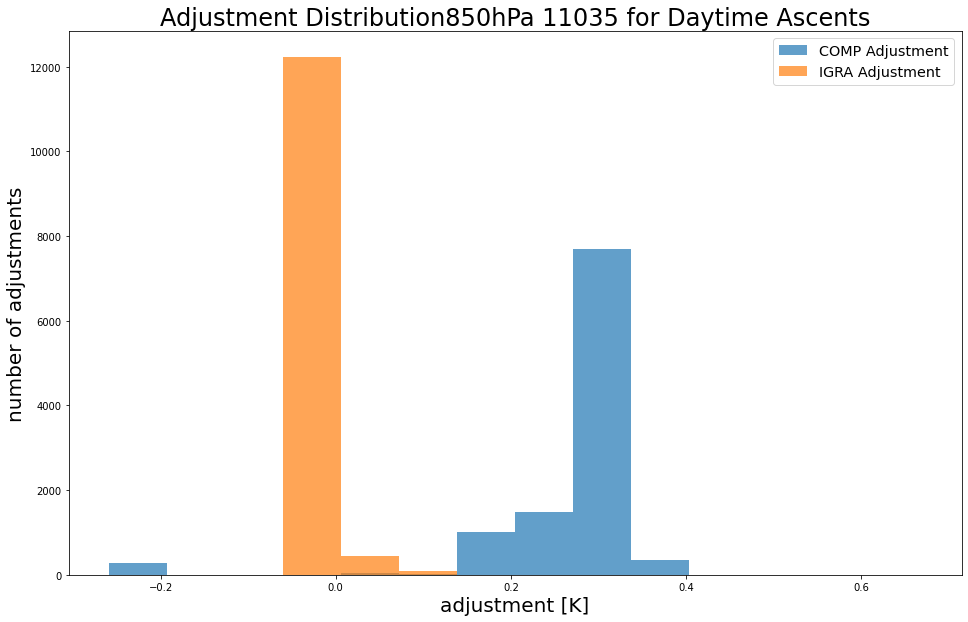

In [28]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment Distribution'+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

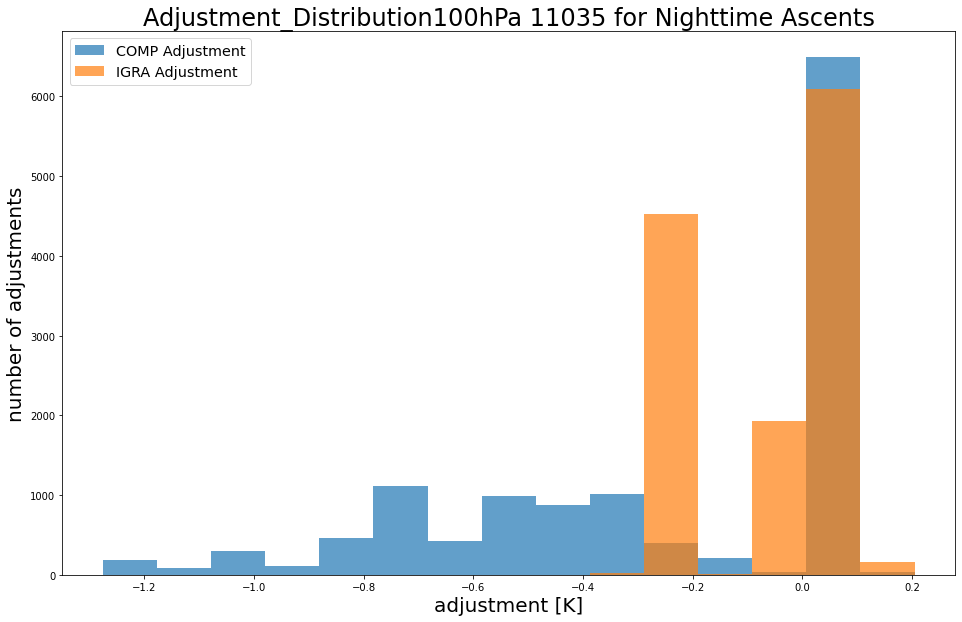

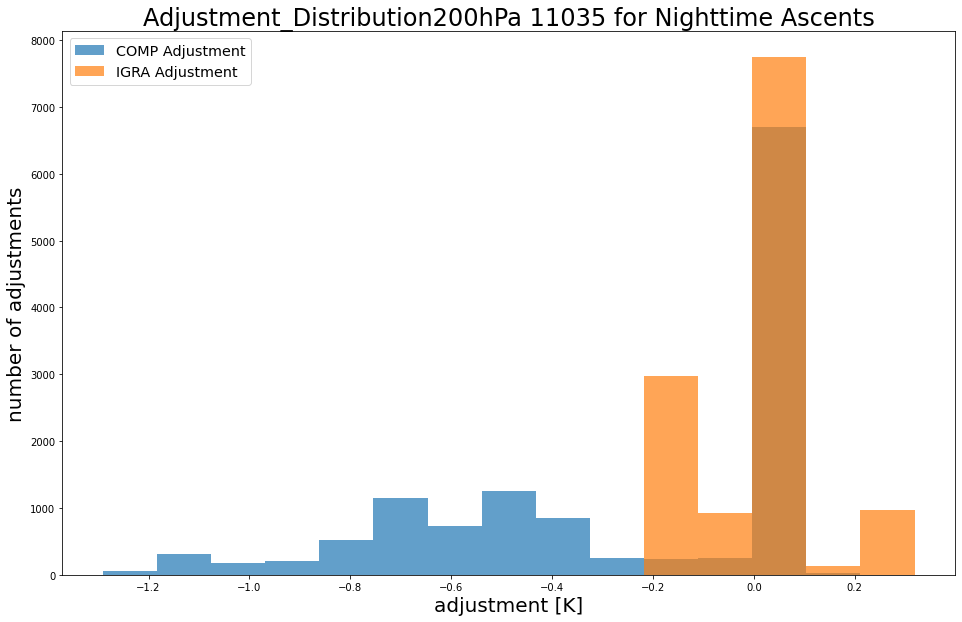

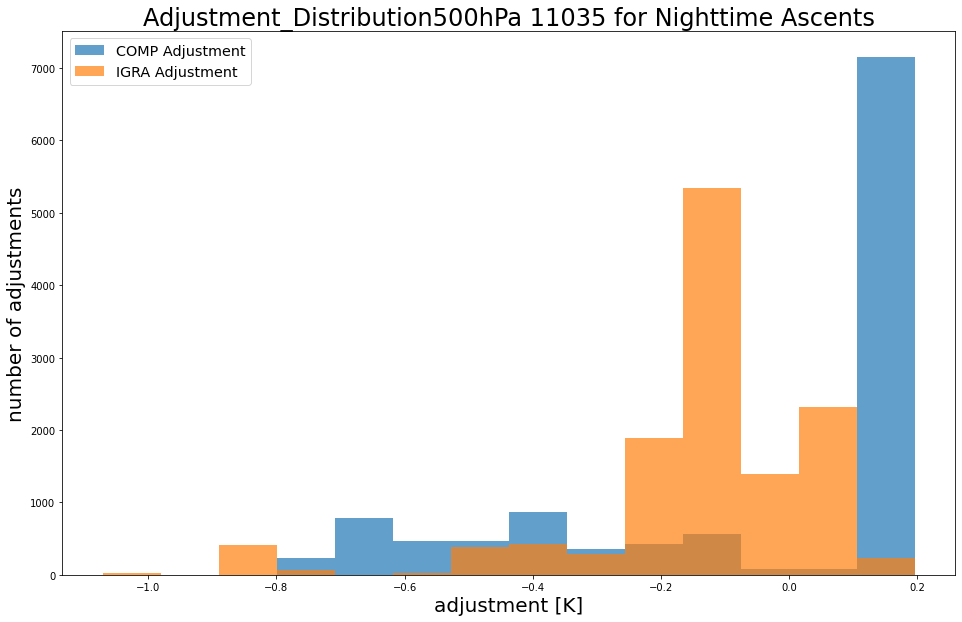

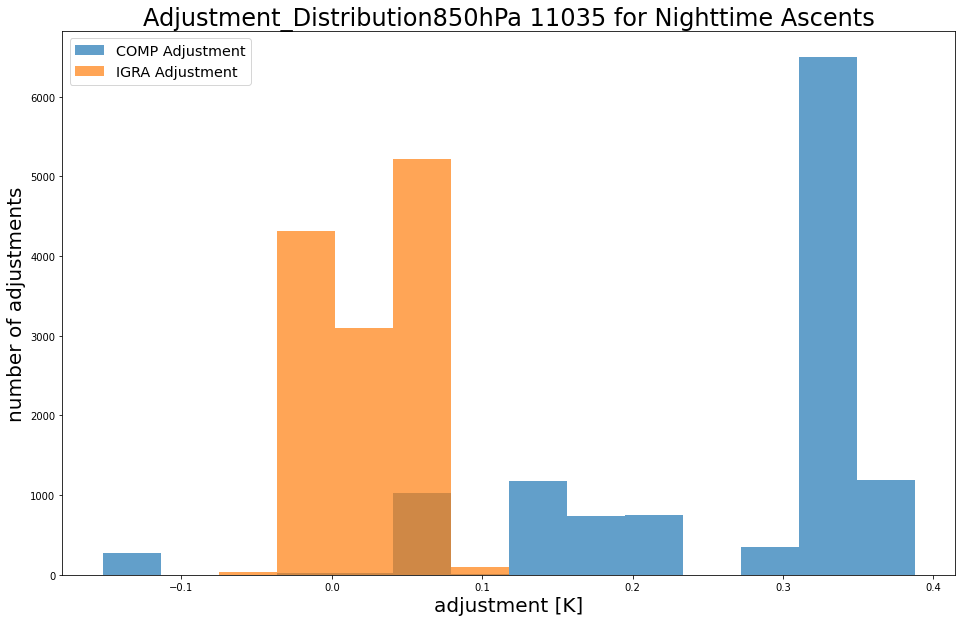

In [29]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)